# <font color="red">Boston Housing Prediction</font>

## Import the Library

In [1]:
# Data manipulation and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, label_binarize

# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import StackingClassifier
from lightgbm import LGBMClassifier

# Metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Utilities
import math
from itertools import cycle
from helperfunctions import *

## Scaler Selection

In [2]:
scaler_types = {
    'minmax': MinMaxScaler(),
    'standard': StandardScaler(),
    'robust': RobustScaler()
}
scaler_name = "robust"
scaler_selection = lambda: scaler_types[scaler_name]

## Import the Datasets

In [15]:
# Load the dataset
boston = pd.read_csv('Datasets/BostonHousingData.csv')
boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2

In [16]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [17]:
boston.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  486.000000  486.000000  486.000000  486.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.720192   23.388876    6.835896    0.255340    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.081900    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.253715    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.560263   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  486.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.518519    3.795043    9.549407  408.237154   18.455534  356.674032   
std     27.999513    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.175000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     76.800000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     93.975000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT        MEDV  
count  486.000000  506.000000  
mean    12.715432   22.532806  
std      7.155871    9.197104  
min      1.730000    5.000000  
25%      7.125000   17.025000  
50%     11.430000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

### Datasets Description

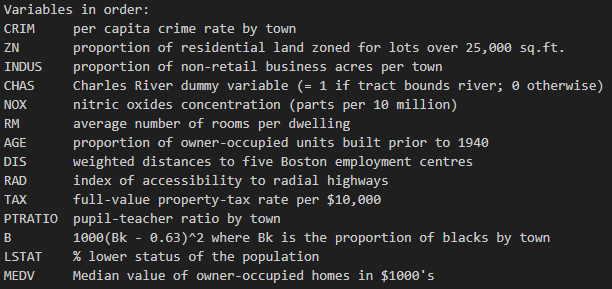

### Handle Null Value

In [18]:
boston.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [19]:
# Fill missing values as specified
boston['CRIM'] = boston['CRIM'].fillna(boston['CRIM'].mean())
boston['ZN'] = boston['ZN'].fillna(boston['ZN'].mean())
boston['INDUS'] = boston['INDUS'].fillna(boston['INDUS'].mean())
boston['CHAS'] = boston['CHAS'].fillna(boston['CHAS'].mode()[0])
boston['AGE'] = boston['AGE'].fillna(boston['AGE'].mean())
boston['LSTAT'] = boston['LSTAT'].fillna(boston['LSTAT'].mean())

In [20]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### Check for Duplicate

In [21]:
duplicates =  boston[boston.duplicated(keep='first')]
duplicates

Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV]
Index: []

No Duplicate Data

### Add MEDV_Class for Classification Problem

In [22]:
# Calculate percentiles for MEDV
low_threshold = boston['MEDV'].quantile(0.25)
high_threshold = boston['MEDV'].quantile(0.75)

def classify_medv(value):
    if value <= low_threshold:
        return 'Low'
    elif value <= high_threshold:
        return 'Medium'
    else:
        return 'High'

boston['MEDV_Class'] = boston['MEDV'].apply(classify_medv)

boston.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B      LSTAT  MEDV MEDV_Class  
0  396.90   4.980000  24.0     Medium  
1  396.90   9.140000  21.6     Medium  
2  392.83   4.030000  34.7       High  
3  394.63   2.940000  33.4       High  
4  396.90  12.715432  36.2       High

## Data Visualization

### Visualize with Graph

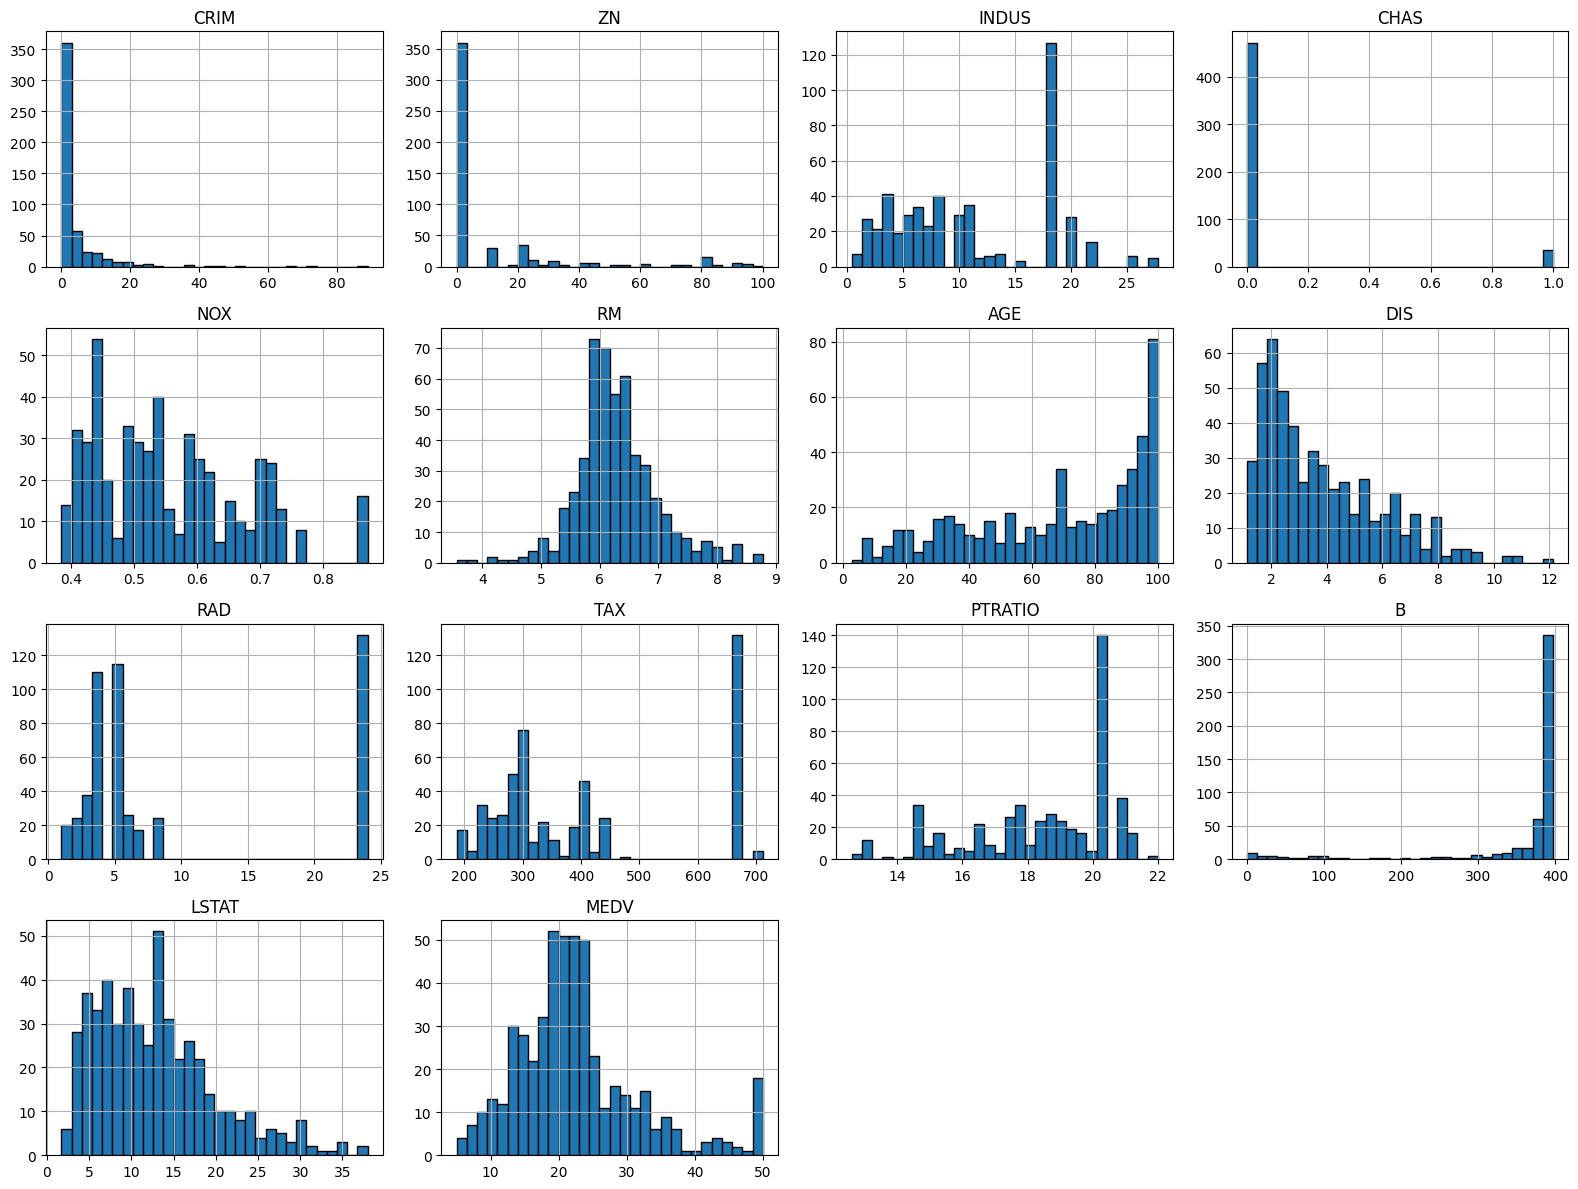

In [23]:
boston.hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.tight_layout()
plt.show()

array([[<Axes: xlabel='CRIM', ylabel='CRIM'>,
        <Axes: xlabel='ZN', ylabel='CRIM'>,
        <Axes: xlabel='INDUS', ylabel='CRIM'>,
        <Axes: xlabel='CHAS', ylabel='CRIM'>,
        <Axes: xlabel='NOX', ylabel='CRIM'>,
        <Axes: xlabel='RM', ylabel='CRIM'>,
        <Axes: xlabel='AGE', ylabel='CRIM'>,
        <Axes: xlabel='DIS', ylabel='CRIM'>,
        <Axes: xlabel='RAD', ylabel='CRIM'>,
        <Axes: xlabel='TAX', ylabel='CRIM'>,
        <Axes: xlabel='PTRATIO', ylabel='CRIM'>,
        <Axes: xlabel='B', ylabel='CRIM'>,
        <Axes: xlabel='LSTAT', ylabel='CRIM'>,
        <Axes: xlabel='MEDV', ylabel='CRIM'>],
       [<Axes: xlabel='CRIM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='INDUS', ylabel='ZN'>,
        <Axes: xlabel='CHAS', ylabel='ZN'>,
        <Axes: xlabel='NOX', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='AGE', ylabel='ZN'>,
        <Axes: xlabel='DIS', ylabel='ZN'>,
        <Axes: x

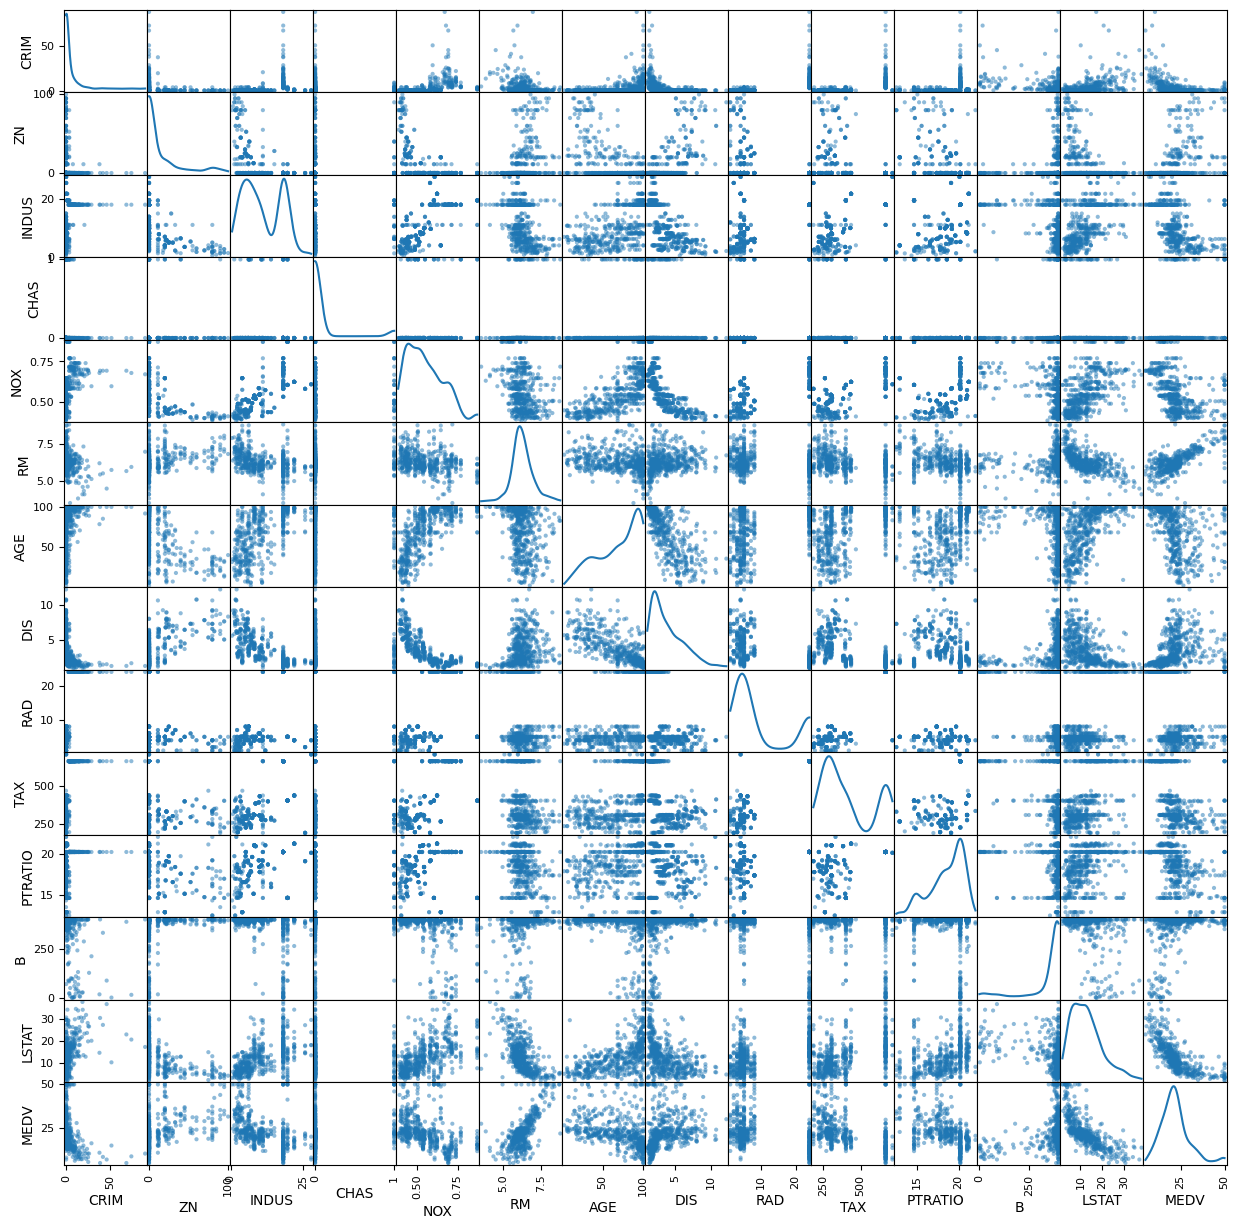

In [24]:
pd.plotting.scatter_matrix(boston, figsize=(15, 15), diagonal='kde')

### Heatmap of the Correlation

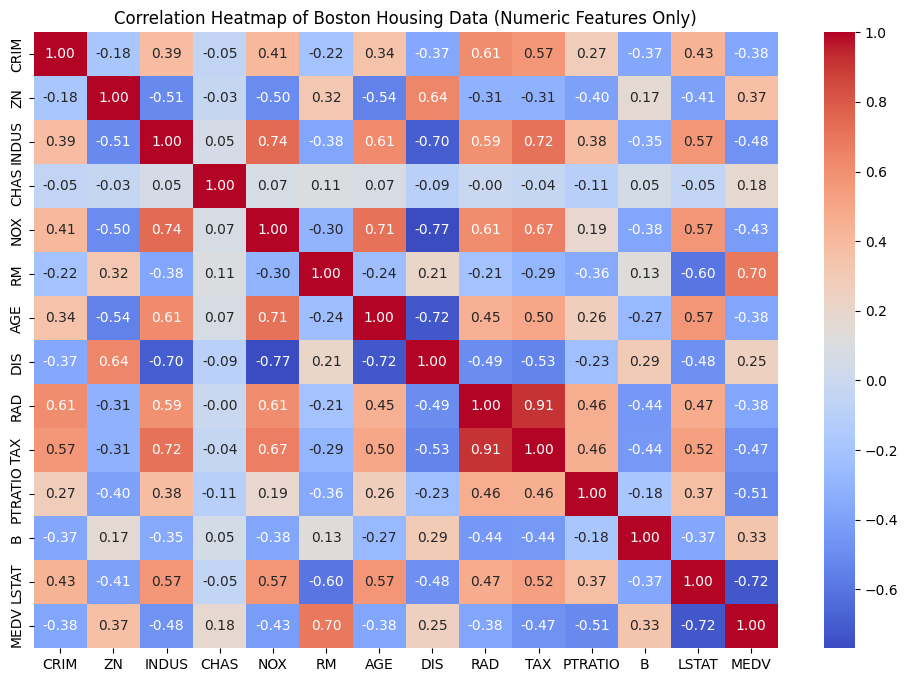

In [25]:
plt.figure(figsize=(12, 8))
corr = boston.select_dtypes(include=[float, int]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Boston Housing Data (Numeric Features Only)')
plt.show()

In [26]:
numeric_cols = boston.select_dtypes(include=[float, int]).columns
correlations = boston[numeric_cols].corr()['MEDV'].sort_values(ascending=False)
print(correlations)

MEDV       1.000000
RM         0.695360
ZN         0.365943
B          0.333461
DIS        0.249929
CHAS       0.183844
CRIM      -0.379695
AGE       -0.380223
RAD       -0.381626
NOX       -0.427321
TAX       -0.468536
INDUS     -0.478657
PTRATIO   -0.507787
LSTAT     -0.721975
Name: MEDV, dtype: float64


### Scatter Plot for the most impact Features

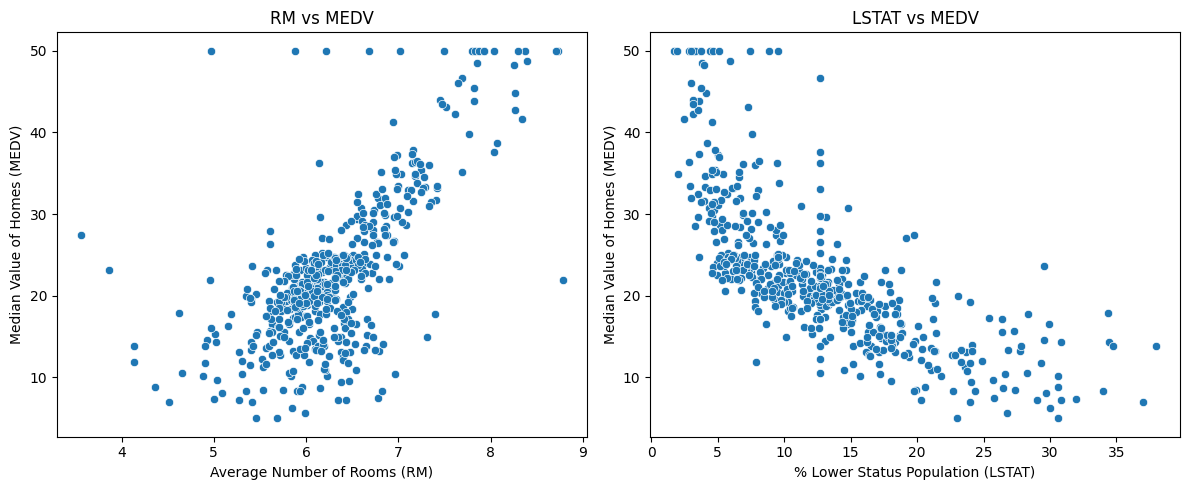

In [27]:
plt.figure(figsize=(12, 5))

# RM vs MEDV
plt.subplot(1, 2, 1)
sns.scatterplot(x='RM', y='MEDV', data=boston)
plt.title('RM vs MEDV')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value of Homes (MEDV)')

# LSTAT vs MEDV
plt.subplot(1, 2, 2)
sns.scatterplot(x='LSTAT', y='MEDV', data=boston)
plt.title('LSTAT vs MEDV')
plt.xlabel('% Lower Status Population (LSTAT)')
plt.ylabel('Median Value of Homes (MEDV)')

plt.tight_layout()
plt.show()

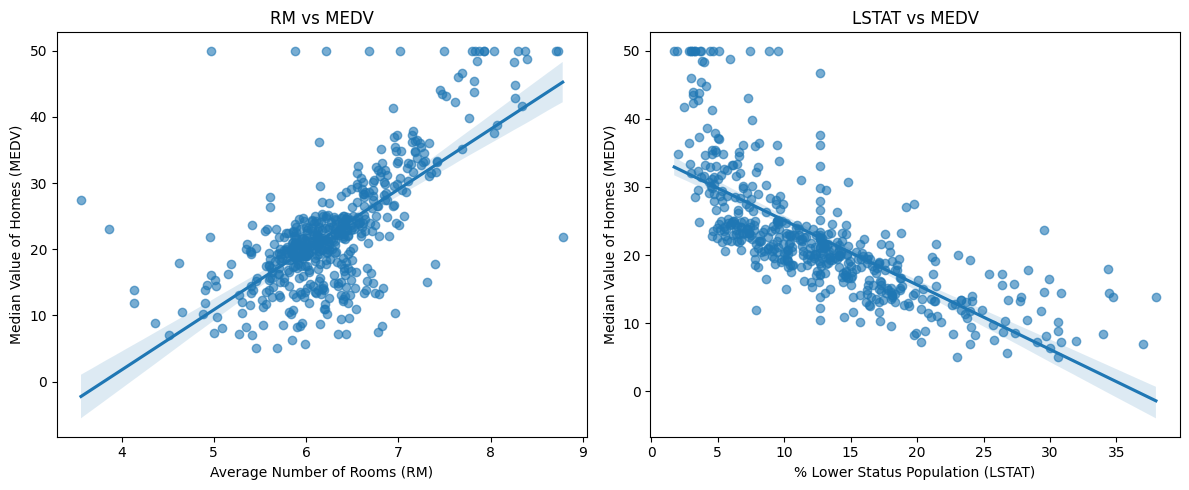

In [28]:
plt.figure(figsize=(12, 5))

# RM vs MEDV with regression line
plt.subplot(1, 2, 1)
sns.regplot(x='RM', y='MEDV', data=boston, scatter_kws={'alpha':0.6})
plt.title('RM vs MEDV')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value of Homes (MEDV)')

# LSTAT vs MEDV with regression line
plt.subplot(1, 2, 2)
sns.regplot(x='LSTAT', y='MEDV', data=boston, scatter_kws={'alpha':0.6})
plt.title('LSTAT vs MEDV')
plt.xlabel('% Lower Status Population (LSTAT)')
plt.ylabel('Median Value of Homes (MEDV)')

plt.tight_layout()
plt.show()

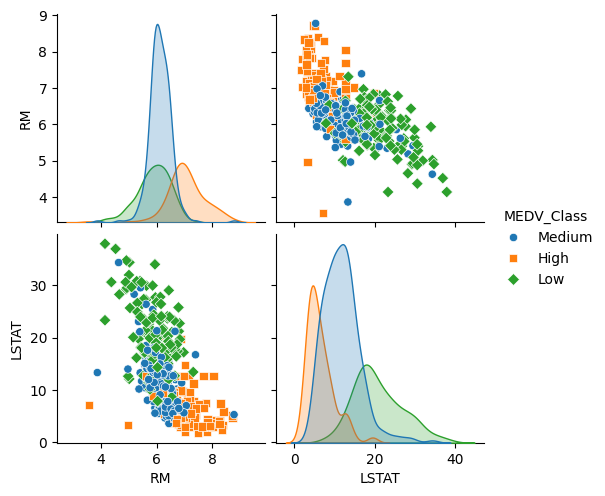

In [29]:
sns.pairplot(
    boston,
    vars=["RM", "LSTAT"],
    hue="MEDV_Class",
    markers=["o", "s", "D"]
)

## Training Regression Model

### Data Split

In [30]:
# Stratified split based on MEDV_Class
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
for train_idx, test_idx in sss.split(boston, boston['MEDV_Class']):
    boston_train = boston.iloc[train_idx]
    boston_test = boston.iloc[test_idx]

In [31]:
# Show the count of each unique class in MEDV_Class
class_counts = boston['MEDV_Class'].value_counts().reset_index()
class_counts.columns = ['MEDV_Class', 'Count']

print("Distribution of data based on MEDV_Class:")
print(class_counts)

Distribution of data based on MEDV_Class:
  MEDV_Class  Count
0     Medium    255
1        Low    127
2       High    124


In [32]:
print("Distribution of MEDV_Class in Training Set:")
print(boston_train['MEDV_Class'].value_counts())

print("\nDistribution of MEDV_Class in Test Set:")
print(boston_test['MEDV_Class'].value_counts())

Distribution of MEDV_Class in Training Set:
MEDV_Class
Medium    204
Low       101
High       99
Name: count, dtype: int64

Distribution of MEDV_Class in Test Set:
MEDV_Class
Medium    51
Low       26
High      25
Name: count, dtype: int64


In [33]:
X_train = boston_train.drop(columns=['MEDV', 'MEDV_Class'])
y_train = boston_train['MEDV']

In [34]:
X_test = boston_test.drop(columns=['MEDV', 'MEDV_Class'])
y_test = boston_test['MEDV']

In [35]:
print("X_train: ", len(X_train))
print("y_train: ", len(y_train))
print("\nX_test: ", len(X_test))
print("y_test: ", len(y_test))

X_train:  404
y_train:  404

X_test:  102
y_test:  102


### Data Scaling

In [36]:
scaler = scaler_selection()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
X_train

array([[-0.07696043,  0.        ,  0.31719597, ..., -0.96428571,
         0.08662989,  0.15156507],
       [ 2.45926023,  0.        ,  0.64329977, ...,  0.39285714,
        -0.6209649 ,  0.60076881],
       [ 1.79861512,  0.        ,  0.64329977, ...,  0.39285714,
         0.27914074,  0.20428336],
       ...,
       [-0.04484818,  0.        ,  0.07862122, ...,  0.03571429,
        -0.65805846, -0.24711697],
       [ 1.52528926,  0.        ,  0.64329977, ...,  0.39285714,
         0.08099542,  0.31301483],
       [-0.06406842,  0.        , -0.56816421, ..., -0.46428571,
         0.14860899, -0.80285557]], shape=(404, 13))

In [38]:
X_test

array([[ 2.72419196,  0.        ,  0.64329977, ...,  0.39285714,
        -2.47892945,  1.95936299],
       [-0.07265836,  0.        ,  0.16537568, ...,  0.67857143,
         0.27914074, -0.71279517],
       [ 0.18132524,  0.        , -0.1281952 , ...,  0.67857143,
        -3.97112337,  0.56562328],
       ...,
       [ 0.26532902,  0.        , -0.1281952 , ...,  0.67857143,
        -0.67543139,  0.9763866 ],
       [-0.06485448,  0.        ,  0.07862122, ...,  0.03571429,
        -0.3392417 , -0.59417902],
       [ 0.01486994,  0.        ,  0.00813323, ..., -0.25      ,
         0.22232656, -0.31301483]], shape=(102, 13))

### Training The Model

#### Linear Regression

In [39]:
LR = LinearRegression()
LR

LinearRegression()

In [40]:
%%time
LR.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 1.43 ms


LinearRegression()

In [41]:
y_pred = LR.predict(X_test)
y_pred

array([11.79313985, 27.26714293, 14.81463407, 21.45696073, 15.24564389,
       20.5140206 , 27.77453834, 29.67506015, 36.13615564, 22.84406559,
       32.58635833, 14.09855017, 19.64482157, 29.23500732, 25.13566744,
       18.75554935, 25.63014908,  8.7752387 , 19.52122296, 23.92570598,
       14.9507333 ,  2.1385725 ,  6.902059  , 21.29432838, 29.88246075,
       11.83943753, 31.06260984, 25.52633063, 26.49644226, 22.12053797,
       25.97971787, 19.56387495, 17.66504541, 31.20265623, 28.55905891,
       27.30250226, 18.04048703, 37.86920121, 14.43117821, 31.06603537,
       36.22357813, 20.71908817, 31.0221969 , 24.24121587, 39.69067619,
       22.28067503, 20.34903899, 29.1614852 , 28.65516472, 20.49982567,
       13.45432102, 19.18786604, 22.45758667, 25.36926693, 34.17616286,
       24.91952816, 34.51452971, 20.26082669, 18.57345745, 19.23160543,
       28.77872558, 13.92097015, 13.49734959, 23.32820338, 17.18938356,
       27.98449054, 24.95990996, 17.13258627, 22.81595001, 12.56

In [42]:
y_test

399     6.3
503    23.9
27     14.8
119    19.3
492    20.1
       ... 
156    13.1
4      36.2
20     13.6
70     24.2
314    23.8
Name: MEDV, Length: 102, dtype: float64

In [ ]:
MSE_LR = mean_squared_error(y_test, y_pred)
MAE_LR = mean_absolute_error(y_test, y_pred)
R2_LR = r2_score(y_test, y_pred)
RMSE_LR = math.sqrt(MSE_LR)

# Save model if better
save_model_if_better_regression(
    model_name="Linear Regression",
    model=LR,
    scaler=scaler,
    scaler_name=scaler_name,
    mse=MSE_LR,
    mae=MAE_LR,
    rmse=RMSE_LR,
    r2=R2_LR,
    parameters=LR.get_params()
)

Linear Regression (robust): First time training - saving model
    New model saved to: saved_models_regression\linear_regression_robust_20250713_133659.pkl
    New scaler saved to: saved_models_regression\linear_regression_scaler_robust_20250713_133659.pkl


True

In [44]:
print("MSE_LR:", MSE_LR)
print("MAE_LR:", MAE_LR)
print("R2_LR:", R2_LR)
print("RMSE_LR:", RMSE_LR)

MSE_LR: 20.781034968139583
MAE_LR: 3.4463959713881134
R2_LR: 0.7247912810542857
RMSE_LR: 4.558622047081726


#### Decision Tree Regressor

In [45]:
DTR = DecisionTreeRegressor()
DTR

DecisionTreeRegressor()

In [46]:
%%time
DTR.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 5.68 ms


DecisionTreeRegressor()

In [47]:
y_pred = DTR.predict(X_test)
y_pred

array([ 9.5, 23.6, 13.9, 16.1, 18.9, 18.2, 24.5, 23.7, 36. , 19.5, 37. ,
       12.7, 20.4, 23.9, 27.5, 15.1, 24.7, 13.4, 19.6, 19.1, 12.7, 11.7,
        7. , 20.5, 20.2,  9.6, 24.8, 25. , 23.8, 18.6, 25. , 14.6, 15.1,
       23.7, 30.1, 21. , 12.1, 46. , 17.3, 30.1, 46.7, 16.1, 30.1, 23.9,
       44.8, 20.7, 23.3, 20.8, 34.9, 17.2, 11.3, 19.4, 18.6, 20.5, 34.9,
       24.4, 23.7, 19. , 17.2, 11.7, 23.3, 12.7, 13.3, 19.6, 12.7, 22.6,
       24. , 17.7, 22.9, 15. , 18.6, 14.1, 34.9, 43.5, 19.6, 43.5, 22.9,
       22.4, 19.4, 33. , 18.5, 17.7, 29.6, 33.2, 24.5, 19.5, 50. , 28. ,
       23.7, 25. , 16.5,  7. , 22. , 50. , 50. , 19. , 23.7, 15.6, 33.1,
       12.7, 22.6, 23.9])

In [48]:
y_test

399     6.3
503    23.9
27     14.8
119    19.3
492    20.1
       ... 
156    13.1
4      36.2
20     13.6
70     24.2
314    23.8
Name: MEDV, Length: 102, dtype: float64

In [ ]:
MSE_DTR = mean_squared_error(y_test, y_pred)
MAE_DTR = mean_absolute_error(y_test, y_pred)
R2_DTR = r2_score(y_test, y_pred)
RMSE_DTR = math.sqrt(MSE_DTR)

# Save model if better
save_model_if_better_regression(
    model_name="Decision Tree",
    model=DTR,
    scaler=scaler,
    scaler_name=scaler_name,
    mse=MSE_DTR,
    mae=MAE_DTR,
    rmse=RMSE_DTR,
    r2=R2_DTR,
    parameters=DTR.get_params()
)

Decision Tree (robust): First time training - saving model
    New model saved to: saved_models_regression\decision_tree_robust_20250713_133659.pkl
    New scaler saved to: saved_models_regression\decision_tree_scaler_robust_20250713_133659.pkl


True

In [50]:
print("MSE_DTR:", MSE_DTR)
print("MAE_DTR:", MAE_DTR)
print("R2_DTR:", R2_DTR)
print("RMSE_DTR:", RMSE_DTR)

MSE_DTR: 29.759215686274512
MAE_DTR: 3.0843137254901962
R2_DTR: 0.6058908693236262
RMSE_DTR: 5.455200792480008


#### Random Forest Regressor

In [51]:
RFR = RandomForestRegressor(random_state=42)
RFR

RandomForestRegressor(random_state=42)

In [52]:
%%time
RFR.fit(X_train, y_train)

CPU times: total: 328 ms
Wall time: 322 ms


RandomForestRegressor(random_state=42)

In [53]:
y_pred = RFR.predict(X_test)
y_pred

array([ 9.684, 26.653, 15.434, 20.453, 20.289, 19.918, 25.826, 24.944,
       33.796, 20.916, 30.963, 15.619, 20.189, 23.442, 27.035, 15.017,
       24.231, 14.355, 20.353, 20.908, 17.498, 13.845,  7.757, 19.586,
       22.415, 10.396, 24.626, 23.446, 24.609, 18.517, 24.821, 13.873,
       14.439, 25.149, 30.718, 21.402, 13.952, 41.534, 11.714, 25.888,
       43.242, 15.905, 29.567, 25.803, 43.205, 23.707, 20.334, 20.994,
       35.318, 12.821, 10.681, 20.633, 18.892, 20.555, 32.982, 22.881,
       27.168, 17.878, 11.087, 14.363, 24.974, 14.567, 14.975, 20.616,
       14.673, 22.448, 21.466, 17.932, 21.123, 18.462, 20.793, 15.816,
       33.726, 44.261, 21.36 , 45.328, 22.577, 20.852, 18.395, 30.847,
       19.84 , 17.171, 32.485, 30.477, 20.407, 17.59 , 33.998, 25.163,
       26.666, 22.705, 21.166,  8.093, 22.08 , 48.813, 20.657, 16.947,
       24.27 , 16.3  , 30.779, 15.186, 23.88 , 24.141])

In [54]:
y_test

399     6.3
503    23.9
27     14.8
119    19.3
492    20.1
       ... 
156    13.1
4      36.2
20     13.6
70     24.2
314    23.8
Name: MEDV, Length: 102, dtype: float64

In [ ]:
MSE_RFR = mean_squared_error(y_test, y_pred)
MAE_RFR = mean_absolute_error(y_test, y_pred)
R2_RFR = r2_score(y_test, y_pred)
RMSE_RFR = math.sqrt(MSE_RFR)

# Save model if better
save_model_if_better_regression(
    model_name="Random Forest",
    model=RFR,
    scaler=scaler,
    scaler_name=scaler_name,
    mse=MSE_RFR,
    mae=MAE_RFR,
    rmse=RMSE_RFR,
    r2=R2_RFR,
    parameters=RFR.get_params()
)

Random Forest (robust): First time training - saving model
    New model saved to: saved_models_regression\random_forest_robust_20250713_133700.pkl
    New scaler saved to: saved_models_regression\random_forest_scaler_robust_20250713_133700.pkl


True

In [56]:
print("MSE_RFR:", MSE_RFR)
print("MAE_RFR:", MAE_RFR)
print("R2_RFR:", R2_RFR)
print("RMSE_RFR:", RMSE_RFR)

MSE_RFR: 8.890182009803922
MAE_RFR: 2.164127450980392
R2_RFR: 0.8822649783389778
RMSE_RFR: 2.981640825083384


#### Support Vector Machine

In [57]:
SVR_model = SVR()
SVR_model

SVR()

In [58]:
%%time
SVR_model.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 8.71 ms


SVR()

In [59]:
y_pred = SVR_model.predict(X_test)
y_pred

array([13.47560607, 24.91161201, 16.98304565, 19.94667658, 18.50537621,
       19.48878482, 26.39309987, 27.33396132, 31.21284749, 19.37034163,
       28.2127715 , 16.47314955, 19.90859771, 24.95978807, 22.51591598,
       17.46329218, 26.87003113, 14.38565853, 19.51219802, 21.22049887,
       16.16034117, 12.82844411, 14.65233632, 19.83332312, 24.40492131,
       12.41289945, 27.58516266, 23.89025105, 25.41166366, 24.91310548,
       24.22221443, 17.77324162, 16.84394954, 27.54051171, 29.04237235,
       22.37147531, 16.50128679, 29.99353433, 13.91390596, 26.94727751,
       31.7871845 , 18.72479585, 29.3914075 , 25.88419191, 33.21704347,
       20.36919821, 21.47049995, 23.28852101, 27.2882035 , 17.44973554,
       13.52269745, 19.97775638, 22.96526945, 20.81366625, 28.51489469,
       23.77453662, 30.30656403, 18.29021896, 14.49472015, 16.02899902,
       26.01920902, 15.93250388, 16.89659846, 20.99053468, 16.12216356,
       24.5388682 , 21.75086653, 18.51905526, 21.87088613, 17.76

In [60]:
y_test

399     6.3
503    23.9
27     14.8
119    19.3
492    20.1
       ... 
156    13.1
4      36.2
20     13.6
70     24.2
314    23.8
Name: MEDV, Length: 102, dtype: float64

In [ ]:
MSE_SVR = mean_squared_error(y_test, y_pred)
MAE_SVR = mean_absolute_error(y_test, y_pred)
R2_SVR = r2_score(y_test, y_pred)
RMSE_SVR = math.sqrt(MSE_SVR)

# Save model if better
save_model_if_better_regression(
    model_name="SVR",
    model=SVR_model,
    scaler=scaler,
    scaler_name=scaler_name,
    mse=MSE_SVR,
    mae=MAE_SVR,
    rmse=RMSE_SVR,
    r2=R2_SVR,
    parameters=SVR_model.get_params()
)

SVR (robust): First time training - saving model
    New model saved to: saved_models_regression\svr_robust_20250713_133700.pkl
    New scaler saved to: saved_models_regression\svr_scaler_robust_20250713_133700.pkl


True

In [62]:
print("MSE_SVR:", MSE_SVR)
print("MAE_SVR:", MAE_SVR)
print("R2_SVR:", R2_SVR)
print("RMSE_SVR:", RMSE_SVR)

MSE_SVR: 24.362684123332425
MAE_SVR: 3.1702554261255984
R2_SVR: 0.6773585580342413
RMSE_SVR: 4.935856979626985


### Grid Search CV - Hyperparameters Tuning

#### Tuning Linear Regressor

In [63]:
linear_param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

In [64]:
linear_grid_search = GridSearchCV(
    LinearRegression(), 
    linear_param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1,
    verbose=1
)

In [65]:
%%time
print("Starting hyperparameter tuning for Linear Regression...")
linear_grid_search.fit(X_train, y_train)

Starting hyperparameter tuning for Linear Regression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 78.1 ms
Wall time: 2.99 s


GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error', verbose=1)

In [66]:
print("LINEAR REGRESSION TUNING RESULTS")
print("="*50)
print("Best Parameters:", linear_grid_search.best_params_)
print("Best Cross-Validation Score (Negative MSE):", linear_grid_search.best_score_)
print("Best Cross-Validation Score (MSE):", -linear_grid_search.best_score_)
print("Best Cross-Validation Score (RMSE):", math.sqrt(-linear_grid_search.best_score_))

LINEAR REGRESSION TUNING RESULTS
Best Parameters: {'copy_X': True, 'fit_intercept': True, 'positive': False}
Best Cross-Validation Score (Negative MSE): -26.174795333860885
Best Cross-Validation Score (MSE): 26.174795333860885
Best Cross-Validation Score (RMSE): 5.1161308949108095


In [67]:
GSCV_LR_Model = linear_grid_search.best_estimator_
y_pred = GSCV_LR_Model.predict(X_test)

In [ ]:
MSE_GSCV_LR = mean_squared_error(y_test, y_pred)
MAE_GSCV_LR = mean_absolute_error(y_test, y_pred)
R2_GSCV_LR = r2_score(y_test, y_pred)
RMSE_GSCV_LR = math.sqrt(MSE_GSCV_LR)

# Save model if better
save_model_if_better_regression(
    model_name="Linear Regression Tuned (GSCV)",
    model=GSCV_LR_Model,
    scaler=scaler,
    scaler_name=scaler_name,
    mse=MSE_GSCV_LR,
    mae=MAE_GSCV_LR,
    rmse=RMSE_GSCV_LR,
    r2=R2_GSCV_LR,
    parameters={
        "best_params": linear_grid_search.best_params_,
        "cv_score": linear_grid_search.best_score_,
        "all_params": GSCV_LR_Model.get_params()
    }
)

Linear Regression Tuned (GSCV) (robust): First time training - saving model
    New model saved to: saved_models_regression\linear_regression_tuned_(gscv)_robust_20250713_133703.pkl
    New scaler saved to: saved_models_regression\linear_regression_tuned_(gscv)_scaler_robust_20250713_133703.pkl


True

In [69]:
print("MSE_GSCV_LR:", MSE_GSCV_LR)
print("MAE_GSCV_LR:", MAE_GSCV_LR)
print("R2_GSCV_LR:", R2_GSCV_LR)
print("RMSE_GSCV_LR:", RMSE_GSCV_LR)

MSE_GSCV_LR: 20.781034968139583
MAE_GSCV_LR: 3.4463959713881134
R2_GSCV_LR: 0.7247912810542857
RMSE_GSCV_LR: 4.558622047081726


#### Tuning Decision Tree Regressor

In [70]:
decision_tree_param_grid = {
    'max_depth': [None, 5, 10, 15, 25],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None, 0.5],
    'criterion': ['squared_error', 'friedman_mse'],
    'min_impurity_decrease': [0.0, 0.01, 0.02],
    'ccp_alpha': [0.0, 0.01, 0.02]
}

In [71]:
decision_tree_grid_search = GridSearchCV(
    DecisionTreeRegressor(random_state=42), 
    decision_tree_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

In [72]:
%%time
print("Starting hyperparameter tuning for Decision Tree Regressor...")
decision_tree_grid_search.fit(X_train, y_train)

Starting hyperparameter tuning for Decision Tree Regressor...
Fitting 5 folds for each of 5760 candidates, totalling 28800 fits
CPU times: total: 6.25 s
Wall time: 15 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0, 0.01, 0.02],
                         'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [None, 5, 10, 15, 25],
                         'max_features': ['sqrt', 'log2', None, 0.5],
                         'min_impurity_decrease': [0.0, 0.01, 0.02],
                         'min_samples_leaf': [1, 2, 4, 8],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='neg_mean_squared_error', verbose=1)

In [73]:
print("DECISION TREE TUNING RESULTS")
print("="*50)
print("Best Parameters:", decision_tree_grid_search.best_params_)
print("Best Cross-Validation Score (Negative MSE):", decision_tree_grid_search.best_score_)
print("Best Cross-Validation Score (MSE):", -decision_tree_grid_search.best_score_)
print("Best Cross-Validation Score (RMSE):", math.sqrt(-decision_tree_grid_search.best_score_))

DECISION TREE TUNING RESULTS
Best Parameters: {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 5, 'max_features': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 8, 'min_samples_split': 2}
Best Cross-Validation Score (Negative MSE): -21.54953892839407
Best Cross-Validation Score (MSE): 21.54953892839407
Best Cross-Validation Score (RMSE): 4.642148094190239


In [74]:
GSCV_DTR_Model = decision_tree_grid_search.best_estimator_
y_pred = GSCV_DTR_Model.predict(X_test)

In [ ]:
MSE_GSCV_DTR = mean_squared_error(y_test, y_pred)
MAE_GSCV_DTR = mean_absolute_error(y_test, y_pred)
R2_GSCV_DTR = r2_score(y_test, y_pred)
RMSE_GSCV_DTR = math.sqrt(MSE_GSCV_DTR)

# Save model if better
save_model_if_better_regression(
    model_name="Decision Tree Tuned (GSCV)",
    model=GSCV_DTR_Model,
    scaler=scaler,
    scaler_name=scaler_name,
    mse=MSE_GSCV_DTR,
    mae=MAE_GSCV_DTR,
    rmse=RMSE_GSCV_DTR,
    r2=R2_GSCV_DTR,
    parameters={
        "best_params": decision_tree_grid_search.best_params_,
        "cv_score": decision_tree_grid_search.best_score_,
        "all_params": GSCV_DTR_Model.get_params()
    }
)

Decision Tree Tuned (GSCV) (robust): First time training - saving model
    New model saved to: saved_models_regression\decision_tree_tuned_(gscv)_robust_20250713_133718.pkl
    New scaler saved to: saved_models_regression\decision_tree_tuned_(gscv)_scaler_robust_20250713_133718.pkl


True

In [76]:
print("MSE_GSCV_DTR:", MSE_GSCV_DTR)
print("MAE_GSCV_DTR:", MAE_GSCV_DTR)
print("R2_GSCV_DTR:", R2_GSCV_DTR)
print("RMSE_GSCV_DTR:", RMSE_GSCV_DTR)

MSE_GSCV_DTR: 17.15274552968538
MAE_GSCV_DTR: 3.1398365087936955
R2_GSCV_DTR: 0.7728416736286763
RMSE_GSCV_DTR: 4.141587320060435


#### Tuning Support Vector Machine

In [77]:
svr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'epsilon': [0.01, 0.1, 0.2],
    'degree': [2, 3, 4, 5],
    'coef0': [0.0, 0.1, 1.0],
    'shrinking': [True, False],
    'tol': [1e-3, 1e-4]
}

In [78]:
svr_grid_search = GridSearchCV(
    SVR(), 
    svr_param_grid, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1,
    verbose=1
)

In [79]:
%%time
print("Starting hyperparameter tuning for SVR...")
svr_grid_search.fit(X_train, y_train)

Starting hyperparameter tuning for SVR...
Fitting 5 folds for each of 11520 candidates, totalling 57600 fits
CPU times: total: 1min 1s
Wall time: 1h 35min 33s


GridSearchCV(cv=5, estimator=SVR(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'coef0': [0.0, 0.1, 1.0],
                         'degree': [2, 3, 4, 5], 'epsilon': [0.01, 0.1, 0.2],
                         'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'shrinking': [True, False], 'tol': [0.001, 0.0001]},
             scoring='neg_mean_squared_error', verbose=1)

In [80]:
print("SVR TUNING RESULTS")
print("="*50)
print("Best Parameters:", svr_grid_search.best_params_)
print("Best Cross-Validation Score (Negative MSE):", svr_grid_search.best_score_)
print("Best Cross-Validation Score (MSE):", -svr_grid_search.best_score_)
print("Best Cross-Validation Score (RMSE):", math.sqrt(-svr_grid_search.best_score_))

SVR TUNING RESULTS
Best Parameters: {'C': 100, 'coef0': 0.0, 'degree': 2, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf', 'shrinking': True, 'tol': 0.001}
Best Cross-Validation Score (Negative MSE): -15.307700449412252
Best Cross-Validation Score (MSE): 15.307700449412252
Best Cross-Validation Score (RMSE): 3.9125056484831116


In [81]:
GSCV_SVR_Model = svr_grid_search.best_estimator_
y_pred_svr = GSCV_SVR_Model.predict(X_test)

In [ ]:
MSE_GSCV_SVR = mean_squared_error(y_test, y_pred_svr)
MAE_GSCV_SVR = mean_absolute_error(y_test, y_pred_svr)
R2_GSCV_SVR = r2_score(y_test, y_pred_svr)
RMSE_GSCV_SVR = math.sqrt(MSE_GSCV_SVR)

# Save model if better
save_model_if_better_regression(
    model_name="SVR Tuned (GSCV)",
    model=GSCV_SVR_Model,
    scaler=scaler,
    scaler_name=scaler_name,
    mse=MSE_GSCV_SVR,
    mae=MAE_GSCV_SVR,
    rmse=RMSE_GSCV_SVR,
    r2=R2_GSCV_SVR,
    parameters={
        "best_params": svr_grid_search.best_params_,
        "cv_score": svr_grid_search.best_score_,
        "all_params": GSCV_SVR_Model.get_params()
    }
)

SVR Tuned (GSCV) (robust): First time training - saving model
    New model saved to: saved_models_regression\svr_tuned_(gscv)_robust_20250713_151251.pkl
    New scaler saved to: saved_models_regression\svr_tuned_(gscv)_scaler_robust_20250713_151251.pkl


True

In [83]:
print("MSE_GSCV_SVR:", MSE_GSCV_SVR)
print("MAE_GSCV_SVR:", MAE_GSCV_SVR)
print("R2_GSCV_SVR:", R2_GSCV_SVR)
print("RMSE_GSCV_SVR:", RMSE_GSCV_SVR)

MSE_GSCV_SVR: 9.81303352595186
MAE_GSCV_SVR: 2.299570843142224
R2_GSCV_SVR: 0.8700434126698199
RMSE_GSCV_SVR: 3.1325761803908074


#### Tuning Random Forest Regressor

In [84]:
# For bootstrap=True cases
bootstrap_true_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True],
    'max_samples': [None, 0.8, 0.9],
    'min_impurity_decrease': [0.0, 0.01, 0.02]
}

# For bootstrap=False cases  
bootstrap_false_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [False],
    'min_impurity_decrease': [0.0, 0.01, 0.02]
}

random_forest_param_grid = [bootstrap_true_params, bootstrap_false_params]

In [85]:
grid_search = GridSearchCV(
    RandomForestRegressor(random_state=42), 
    random_forest_param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
)

In [86]:
%%time
print("Starting hyperparameter tuning for Random Forest...")
grid_search.fit(X_train, y_train)

Starting hyperparameter tuning for Random Forest...
Fitting 5 folds for each of 8640 candidates, totalling 43200 fits
CPU times: total: 1min 26s
Wall time: 52min 57s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'bootstrap': [True], 'max_depth': [None, 10, 20, 30],
                          'max_features': ['sqrt', 'log2', None],
                          'max_samples': [None, 0.8, 0.9],
                          'min_impurity_decrease': [0.0, 0.01, 0.02],
                          'min_samples_leaf': [1, 2, 4, 6],
                          'min_samples_split': [2, 5, 10, 15, 20],
                          'n_estimators': [100, 200, 300]},
                         {'bootstrap': [False], 'max_depth': [None, 10, 20, 30],
                          'max_features': ['sqrt', 'log2', None],
                          'min_impurity_decrease': [0.0, 0.01, 0.02],
                          'min_samples_leaf': [1, 2, 4, 6],
                          'min_samples_split': [2, 5, 10, 15, 20],
                          'n_estimators': [100, 200, 300]}],
             scoring='neg_mean_squared_error', verbose=1)

In [87]:
print("HYPERPARAMETER TUNING RESULTS")
print("="*50)
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score (Negative MSE):", grid_search.best_score_)
print("Best Cross-Validation Score (MSE):", -grid_search.best_score_)
print("Best Cross-Validation Score (RMSE):", math.sqrt(-grid_search.best_score_))

HYPERPARAMETER TUNING RESULTS
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score (Negative MSE): -10.647580671085679
Best Cross-Validation Score (MSE): 10.647580671085679
Best Cross-Validation Score (RMSE): 3.2630630810766865


In [88]:
GSCV_RFR_Model = grid_search.best_estimator_
y_pred = GSCV_RFR_Model.predict(X_test)

In [ ]:
MSE_GSCV_RFR = mean_squared_error(y_test, y_pred)
MAE_GSCV_RFR = mean_absolute_error(y_test, y_pred)
R2_GSCV_RFR = r2_score(y_test, y_pred)
RMSE_GSCV_RFR = math.sqrt(MSE_GSCV_RFR)

# Save model if better
save_model_if_better_regression(
    model_name="Random Forest Tuned (GSCV)",
    model=GSCV_RFR_Model,
    scaler=scaler,
    scaler_name=scaler_name,
    mse=MSE_GSCV_RFR,
    mae=MAE_GSCV_RFR,
    rmse=RMSE_GSCV_RFR,
    r2=R2_GSCV_RFR,
    parameters={
        "best_params": grid_search.best_params_,
        "cv_score": grid_search.best_score_,
        "all_params": GSCV_RFR_Model.get_params()
    }
)

Random Forest Tuned (GSCV) (robust): First time training - saving model
    New model saved to: saved_models_regression\random_forest_tuned_(gscv)_robust_20250713_160549.pkl
    New scaler saved to: saved_models_regression\random_forest_tuned_(gscv)_scaler_robust_20250713_160549.pkl


True

In [90]:
print("MSE_GSCV_RFR:", MSE_GSCV_RFR)
print("MAE_GSCV_RFR:", MAE_GSCV_RFR)
print("R2_GSCV_RFR:", R2_GSCV_RFR)
print("RMSE_GSCV_RFR:", RMSE_GSCV_RFR)

MSE_GSCV_RFR: 7.074818031700321
MAE_GSCV_RFR: 1.947229664624548
R2_GSCV_RFR: 0.9063063215925768
RMSE_GSCV_RFR: 2.659853009416182


In [91]:
feature_names = boston.drop(columns=['MEDV', 'MEDV_Class']).columns

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': GSCV_RFR_Model.feature_importances_
}).sort_values('importance', ascending=False)

print("FEATURE IMPORTANCE (TOP 10)")
print("="*50)
print(feature_importance.head(10))

FEATURE IMPORTANCE (TOP 10)
    feature  importance
5        RM    0.280027
12    LSTAT    0.238473
4       NOX    0.081202
2     INDUS    0.078846
10  PTRATIO    0.065723
7       DIS    0.063773
0      CRIM    0.059544
9       TAX    0.040773
6       AGE    0.027436
11        B    0.024855


### Randomized Search CV - Hyperparameters Tuning

#### Tuning Linear Regressor

In [92]:
linear_param_dist = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'positive': [True, False]
}

In [93]:
linear_random_search = RandomizedSearchCV(
    LinearRegression(), 
    linear_param_dist, 
    n_iter=8,
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [94]:
%%time
print("Starting RANDOMIZED hyperparameter tuning for Linear Regression...")
linear_random_search.fit(X_train, y_train)

Starting RANDOMIZED hyperparameter tuning for Linear Regression...
Fitting 5 folds for each of 8 candidates, totalling 40 fits
CPU times: total: 31.2 ms
Wall time: 69.5 ms


RandomizedSearchCV(cv=5, estimator=LinearRegression(), n_iter=8, n_jobs=-1,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'positive': [True, False]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [95]:
print("LINEAR REGRESSION RANDOMIZED SEARCH RESULTS")
print("="*50)
print("Best Parameters:", linear_random_search.best_params_)
print("Best Cross-Validation Score (Negative MSE):", linear_random_search.best_score_)
print("Best Cross-Validation Score (MSE):", -linear_random_search.best_score_)
print("Best Cross-Validation Score (RMSE):", math.sqrt(-linear_random_search.best_score_))

LINEAR REGRESSION RANDOMIZED SEARCH RESULTS
Best Parameters: {'positive': False, 'fit_intercept': True, 'copy_X': True}
Best Cross-Validation Score (Negative MSE): -26.174795333860885
Best Cross-Validation Score (MSE): 26.174795333860885
Best Cross-Validation Score (RMSE): 5.1161308949108095


In [96]:
RSCV_LR_Model = linear_random_search.best_estimator_
y_pred = RSCV_LR_Model.predict(X_test)

In [ ]:
MSE_RSCV_LR = mean_squared_error(y_test, y_pred)
MAE_RSCV_LR = mean_absolute_error(y_test, y_pred)
R2_RSCV_LR = r2_score(y_test, y_pred)
RMSE_RSCV_LR = math.sqrt(MSE_RSCV_LR)

# Save model if better
save_model_if_better_regression(
    model_name="Linear Regression Tuned (RSCV)",
    model=RSCV_LR_Model,
    scaler=scaler,
    scaler_name=scaler_name,
    mse=MSE_RSCV_LR,
    mae=MAE_RSCV_LR,
    rmse=RMSE_RSCV_LR,
    r2=R2_RSCV_LR,
    parameters={
        "best_params": linear_random_search.best_params_,
        "cv_score": linear_random_search.best_score_,
        "all_params": RSCV_LR_Model.get_params()
    }
)

Linear Regression Tuned (RSCV) (robust): First time training - saving model
    New model saved to: saved_models_regression\linear_regression_tuned_(rscv)_robust_20250713_160550.pkl
    New scaler saved to: saved_models_regression\linear_regression_tuned_(rscv)_scaler_robust_20250713_160550.pkl


True

In [98]:
print("MSE_RSCV_LR:", MSE_RSCV_LR)
print("MAE_RSCV_LR:", MAE_RSCV_LR)
print("R2_RSCV_LR:", R2_RSCV_LR)
print("RMSE_RSCV_LR:", RMSE_RSCV_LR)

MSE_RSCV_LR: 20.781034968139583
MAE_RSCV_LR: 3.4463959713881134
R2_RSCV_LR: 0.7247912810542857
RMSE_RSCV_LR: 4.558622047081726


#### Tuning Decision Tree Regressor

In [99]:
decision_tree_param_dist = {
    'max_depth': [None, 3, 5, 8, 10, 15, 20, 25, 30, 35],
    'min_samples_split': [2, 3, 5, 8, 10, 15, 20, 25, 30],
    'min_samples_leaf': [1, 2, 3, 4, 6, 8, 10, 12, 15],
    'max_features': ['sqrt', 'log2', None, 0.3, 0.5, 0.7, 0.8, 1.0],
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'min_impurity_decrease': [0.0, 0.005, 0.01, 0.015, 0.02, 0.03, 0.05],
    'ccp_alpha': [0.0, 0.005, 0.01, 0.015, 0.02, 0.03, 0.05, 0.1],
    'splitter': ['best', 'random'],
    'max_leaf_nodes': [None, 10, 20, 30, 50, 100, 150, 200, 300],
    'min_weight_fraction_leaf': [0.0, 0.01, 0.02, 0.05, 0.1]
}

In [100]:
decision_tree_random_search = RandomizedSearchCV(
    DecisionTreeRegressor(random_state=42), 
    decision_tree_param_dist,
    n_iter=200,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [101]:
%%time
print("Starting RANDOMIZED hyperparameter tuning for Decision Tree Regressor...")
decision_tree_random_search.fit(X_train, y_train)

Starting RANDOMIZED hyperparameter tuning for Decision Tree Regressor...
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
CPU times: total: 516 ms
Wall time: 867 ms


RandomizedSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0, 0.005, 0.01, 0.015,
                                                      0.02, 0.03, 0.05, 0.1],
                                        'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': [None, 3, 5, 8, 10, 15, 20,
                                                      25, 30, 35],
                                        'max_features': ['sqrt', 'log2', None,
                                                         0.3, 0.5, 0.7, 0.8,
                                                         1.0],
                                        'max_leaf_nodes': [None, 10, 20, 30, 50,
                                                           100, 150, 200, 300],
                                        'min_impurity_decrease': [0.0, 0.005,
                                                                  0.01, 0.015,
                                                                  0.02, 0.03,
                                                                  0.05],
                                        'min_samples_leaf': [1, 2, 3, 4, 6, 8,
                                                             10, 12, 15],
                                        'min_samples_split': [2, 3, 5, 8, 10,
                                                              15, 20, 25, 30],
                                        'min_weight_fraction_leaf': [0.0, 0.01,
                                                                     0.02, 0.05,
                                                                     0.1],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [102]:
print("DECISION TREE RANDOMIZED SEARCH RESULTS")
print("="*50)
print("Best Parameters:", decision_tree_random_search.best_params_)
print("Best Cross-Validation Score (Negative MSE):", decision_tree_random_search.best_score_)
print("Best Cross-Validation Score (MSE):", -decision_tree_random_search.best_score_)
print("Best Cross-Validation Score (RMSE):", math.sqrt(-decision_tree_random_search.best_score_))

DECISION TREE RANDOMIZED SEARCH RESULTS
Best Parameters: {'splitter': 'best', 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 20, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.005, 'max_leaf_nodes': 30, 'max_features': 1.0, 'max_depth': 35, 'criterion': 'poisson', 'ccp_alpha': 0.015}
Best Cross-Validation Score (Negative MSE): -18.982497916703586
Best Cross-Validation Score (MSE): 18.982497916703586
Best Cross-Validation Score (RMSE): 4.3568908543482685


In [103]:
RSCV_DTR_Model = decision_tree_random_search.best_estimator_
y_pred = RSCV_DTR_Model.predict(X_test)

In [ ]:
MSE_RSCV_DTR = mean_squared_error(y_test, y_pred)
MAE_RSCV_DTR = mean_absolute_error(y_test, y_pred)
R2_RSCV_DTR = r2_score(y_test, y_pred)
RMSE_RSCV_DTR = math.sqrt(MSE_RSCV_DTR)

# Save model if better
save_model_if_better_regression(
    model_name="Decision Tree Tuned (RSCV)",
    model=RSCV_DTR_Model,
    scaler=scaler,
    scaler_name=scaler_name,
    mse=MSE_RSCV_DTR,
    mae=MAE_RSCV_DTR,
    rmse=RMSE_RSCV_DTR,
    r2=R2_RSCV_DTR,
    parameters={
        "best_params": decision_tree_random_search.best_params_,
        "cv_score": decision_tree_random_search.best_score_,
        "all_params": RSCV_DTR_Model.get_params()
    }
)

Decision Tree Tuned (RSCV) (robust): First time training - saving model
    New model saved to: saved_models_regression\decision_tree_tuned_(rscv)_robust_20250713_160551.pkl
    New scaler saved to: saved_models_regression\decision_tree_tuned_(rscv)_scaler_robust_20250713_160551.pkl


True

In [105]:
print("MSE_RSCV_DTR:", MSE_RSCV_DTR)
print("MAE_RSCV_DTR:", MAE_RSCV_DTR)
print("R2_RSCV_DTR:", R2_RSCV_DTR)
print("RMSE_RSCV_DTR:", RMSE_RSCV_DTR)

MSE_RSCV_DTR: 15.964036457685893
MAE_RSCV_DTR: 2.919829398649092
R2_RSCV_DTR: 0.788584060925829
RMSE_RSCV_DTR: 3.9955020282419946


#### Tuning Support Vector Machine

In [106]:
svr_param_dist = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['linear', 'rbf', 'poly'],
    'epsilon': [0.01, 0.1, 0.2, 0.5],
    'degree': [2, 3, 4],
    'coef0': [0.0, 0.1, 1.0],
    'shrinking': [True, False],
    'tol': [1e-3, 1e-4],
    'cache_size': [200],
    'max_iter': [10000, 50000, 100000]
}

In [107]:
svr_random_search = RandomizedSearchCV(
    SVR(), 
    svr_param_dist,
    n_iter=200,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [108]:
%%time
print("Starting RANDOMIZED hyperparameter tuning for SVR...")
svr_random_search.fit(X_train, y_train)

Starting RANDOMIZED hyperparameter tuning for SVR...
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
CPU times: total: 812 ms
Wall time: 16.9 s


RandomizedSearchCV(cv=5, estimator=SVR(), n_iter=200, n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'cache_size': [200],
                                        'coef0': [0.0, 0.1, 1.0],
                                        'degree': [2, 3, 4],
                                        'epsilon': [0.01, 0.1, 0.2, 0.5],
                                        'gamma': ['scale', 'auto', 0.001, 0.01,
                                                  0.1],
                                        'kernel': ['linear', 'rbf', 'poly'],
                                        'max_iter': [10000, 50000, 100000],
                                        'shrinking': [True, False],
                                        'tol': [0.001, 0.0001]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [109]:
print("SVR RANDOMIZED SEARCH RESULTS")
print("="*50)
print("Best Parameters:", svr_random_search.best_params_)
print("Best Cross-Validation Score (Negative MSE):", svr_random_search.best_score_)
print("Best Cross-Validation Score (MSE):", -svr_random_search.best_score_)
print("Best Cross-Validation Score (RMSE):", math.sqrt(-svr_random_search.best_score_))

SVR RANDOMIZED SEARCH RESULTS
Best Parameters: {'tol': 0.001, 'shrinking': True, 'max_iter': 100000, 'kernel': 'rbf', 'gamma': 'auto', 'epsilon': 0.1, 'degree': 4, 'coef0': 0.1, 'cache_size': 200, 'C': 100}
Best Cross-Validation Score (Negative MSE): -15.307700449412252
Best Cross-Validation Score (MSE): 15.307700449412252
Best Cross-Validation Score (RMSE): 3.9125056484831116


In [110]:
RSCV_SVR_Model = svr_random_search.best_estimator_
y_pred = RSCV_SVR_Model.predict(X_test)

In [ ]:
MSE_RSCV_SVR = mean_squared_error(y_test, y_pred)
MAE_RSCV_SVR = mean_absolute_error(y_test, y_pred)
R2_RSCV_SVR = r2_score(y_test, y_pred)
RMSE_RSCV_SVR = math.sqrt(MSE_RSCV_SVR)

# Save model if better
save_model_if_better_regression(
    model_name="SVR Tuned (RSCV)",
    model=RSCV_SVR_Model,
    scaler=scaler,
    scaler_name=scaler_name,
    mse=MSE_RSCV_SVR,
    mae=MAE_RSCV_SVR,
    rmse=RMSE_RSCV_SVR,
    r2=R2_RSCV_SVR,
    parameters={
        "best_params": svr_random_search.best_params_,
        "cv_score": svr_random_search.best_score_,
        "all_params": RSCV_SVR_Model.get_params()
    }
)

SVR Tuned (RSCV) (robust): First time training - saving model
    New model saved to: saved_models_regression\svr_tuned_(rscv)_robust_20250713_160608.pkl
    New scaler saved to: saved_models_regression\svr_tuned_(rscv)_scaler_robust_20250713_160608.pkl


True

In [112]:
print("MSE_RSCV_SVR:", MSE_RSCV_SVR)
print("MAE_RSCV_SVR:", MAE_RSCV_SVR)
print("R2_RSCV_SVR:", R2_RSCV_SVR)
print("RMSE_RSCV_SVR:", RMSE_RSCV_SVR)

MSE_RSCV_SVR: 9.81303352595186
MAE_RSCV_SVR: 2.299570843142224
R2_RSCV_SVR: 0.8700434126698199
RMSE_RSCV_SVR: 3.1325761803908074


#### Tuning Random Forest Regressor

In [113]:
# For bootstrap=True cases
bootstrap_true_params = {
    'n_estimators': [50, 100, 150, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 40],
    'min_samples_split': [2, 3, 5, 8, 10, 15, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 8, 10],
    'max_features': ['sqrt', 'log2', None, 0.3, 0.5, 0.7, 0.8],
    'bootstrap': [True],
    'max_samples': [None, 0.7, 0.8, 0.9, 0.95],
    'min_impurity_decrease': [0.0, 0.001, 0.005, 0.01, 0.015, 0.02],
    'max_leaf_nodes': [None, 20, 30, 50, 100, 200, 300],
    'min_weight_fraction_leaf': [0.0, 0.01, 0.02, 0.05],
    'ccp_alpha': [0.0, 0.001, 0.005, 0.01, 0.015],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse']
}

# For bootstrap=False cases  
bootstrap_false_params = {
    'n_estimators': [50, 100, 150, 200, 300, 400, 500],
    'max_depth': [None, 5, 10, 15, 20, 25, 30, 40],
    'min_samples_split': [2, 3, 5, 8, 10, 15, 20],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6, 8, 10],
    'max_features': ['sqrt', 'log2', None, 0.3, 0.5, 0.7, 0.8],
    'bootstrap': [False],
    'min_impurity_decrease': [0.0, 0.001, 0.005, 0.01, 0.015, 0.02],
    'max_leaf_nodes': [None, 20, 30, 50, 100, 200, 300],
    'min_weight_fraction_leaf': [0.0, 0.01, 0.02, 0.05],
    'ccp_alpha': [0.0, 0.001, 0.005, 0.01, 0.015],
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse']
}

# Combine both parameter spaces
random_forest_param_dist = [bootstrap_true_params, bootstrap_false_params]

In [114]:
random_forest_random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=42), 
    random_forest_param_dist,
    n_iter=200,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

In [115]:
%%time
print("Starting RANDOMIZED hyperparameter tuning for Random Forest...")
random_forest_random_search.fit(X_train, y_train)

Starting RANDOMIZED hyperparameter tuning for Random Forest...
Fitting 5 folds for each of 200 candidates, totalling 1000 fits
CPU times: total: 4.38 s
Wall time: 2min 35s


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=200, n_jobs=-1,
                   param_distributions=[{'bootstrap': [True],
                                         'ccp_alpha': [0.0, 0.001, 0.005, 0.01,
                                                       0.015],
                                         'criterion': ['squared_error',
                                                       'absolute_error',
                                                       'friedman_mse'],
                                         'max_depth': [None, 5, 10, 15, 20, 25,
                                                       30, 40],
                                         'max_features': ['sqrt', 'log2', None,
                                                          0.3, 0.5, 0.7, 0.8],
                                         'max_leaf_nodes': [Non...
                                                          0.3, 0.5, 0.7, 0.8],
                                         'max_leaf_nodes': [None, 20, 30, 50,
                                                            100, 200, 300],
                                         'min_impurity_decrease': [0.0, 0.001,
                                                                   0.005, 0.01,
                                                                   0.015,
                                                                   0.02],
                                         'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                              8, 10],
                                         'min_samples_split': [2, 3, 5, 8, 10,
                                                               15, 20],
                                         'min_weight_fraction_leaf': [0.0, 0.01,
                                                                      0.02,
                                                                      0.05],
                                         'n_estimators': [50, 100, 150, 200,
                                                          300, 400, 500]}],
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=1)

In [116]:
print("RANDOM FOREST RANDOMIZED SEARCH RESULTS")
print("="*50)
print("Best Parameters:", random_forest_random_search.best_params_)
print("Best Cross-Validation Score (Negative MSE):", random_forest_random_search.best_score_)
print("Best Cross-Validation Score (MSE):", -random_forest_random_search.best_score_)
print("Best Cross-Validation Score (RMSE):", math.sqrt(-random_forest_random_search.best_score_))

RANDOM FOREST RANDOMIZED SEARCH RESULTS
Best Parameters: {'n_estimators': 300, 'min_weight_fraction_leaf': 0.0, 'min_samples_split': 8, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.01, 'max_samples': 0.7, 'max_leaf_nodes': 100, 'max_features': 0.5, 'max_depth': 40, 'criterion': 'absolute_error', 'ccp_alpha': 0.0, 'bootstrap': True}
Best Cross-Validation Score (Negative MSE): -13.089151111436042
Best Cross-Validation Score (MSE): 13.089151111436042
Best Cross-Validation Score (RMSE): 3.61789318684729


In [117]:
RSCV_RFR_Model = random_forest_random_search.best_estimator_
y_pred = RSCV_RFR_Model.predict(X_test)

In [ ]:
MSE_RSCV_RFR = mean_squared_error(y_test, y_pred)
MAE_RSCV_RFR = mean_absolute_error(y_test, y_pred)
R2_RSCV_RFR = r2_score(y_test, y_pred)
RMSE_RSCV_RFR = math.sqrt(MSE_RSCV_RFR)

# Save model if better
save_model_if_better_regression(
    model_name="Random Forest Tuned (RSCV)",
    model=RSCV_RFR_Model,
    scaler=scaler,
    scaler_name=scaler_name,
    mse=MSE_RSCV_RFR,
    mae=MAE_RSCV_RFR,
    rmse=RMSE_RSCV_RFR,
    r2=R2_RSCV_RFR,
    parameters={
        "best_params": random_forest_random_search.best_params_,
        "cv_score": random_forest_random_search.best_score_,
        "all_params": RSCV_RFR_Model.get_params()
    }
)

Random Forest Tuned (RSCV) (robust): First time training - saving model
    New model saved to: saved_models_regression\random_forest_tuned_(rscv)_robust_20250713_160843.pkl
    New scaler saved to: saved_models_regression\random_forest_tuned_(rscv)_scaler_robust_20250713_160843.pkl


True

In [119]:
print("MSE_RSCV_RFR:", MSE_RSCV_RFR)
print("MAE_RSCV_RFR:", MAE_RSCV_RFR)
print("R2_RSCV_RFR:", R2_RSCV_RFR)
print("RMSE_RSCV_RFR:", RMSE_RSCV_RFR)

MSE_RSCV_RFR: 8.081069477396527
MAE_RSCV_RFR: 2.213720588235294
R2_RSCV_RFR: 0.8929802686923292
RMSE_RSCV_RFR: 2.8427221949034216


### Comparison Table for All Regression Model including Tuning

In [120]:
# Display final model registry
show_model_registry_regression()


MODEL REGISTRY - BEST PERFORMING MODELS (Sorted by R2)
                    model_name scaler_type       mse      mae     rmse       r2       timestamp
    Random Forest Tuned (GSCV)      minmax  7.026586 1.944200 2.650771 0.906945 20250713_035443
    Random Forest Tuned (GSCV)    standard  7.071511 1.945986 2.659231 0.906350 20250713_132945
    Random Forest Tuned (GSCV)      robust  7.074818 1.947230 2.659853 0.906306 20250713_160549
              SVR Tuned (GSCV)      minmax  7.597422 1.998277 2.756342 0.899385 20250713_030350
              SVR Tuned (RSCV)      minmax  7.880908 2.033438 2.807296 0.895631 20250713_035450
    Random Forest Tuned (RSCV)      minmax  8.081022 2.211931 2.842714 0.892981 20250713_035719
    Random Forest Tuned (RSCV)      robust  8.081069 2.213721 2.842722 0.892980 20250713_160843
    Random Forest Tuned (RSCV)    standard  8.086352 2.211742 2.843651 0.892910 20250713_133247
              SVR Tuned (RSCV)    standard  8.737553 2.177506 2.955935 0.884286 

## Training Classification Model

### Data Split

In [121]:
# Stratified split based on MEDV_Class
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
for train_idx, test_idx in sss.split(boston, boston['MEDV_Class']):
    boston_train = boston.iloc[train_idx]
    boston_test = boston.iloc[test_idx]

In [122]:
# Show the count of each unique class in MEDV_Class
class_counts = boston['MEDV_Class'].value_counts().reset_index()
class_counts.columns = ['MEDV_Class', 'Count']

print("Distribution of data based on MEDV_Class:")
print(class_counts)

Distribution of data based on MEDV_Class:
  MEDV_Class  Count
0     Medium    255
1        Low    127
2       High    124


In [123]:
print("Distribution of MEDV_Class in Training Set:")
print(boston_train['MEDV_Class'].value_counts())

print("\nDistribution of MEDV_Class in Test Set:")
print(boston_test['MEDV_Class'].value_counts())

Distribution of MEDV_Class in Training Set:
MEDV_Class
Medium    204
Low       101
High       99
Name: count, dtype: int64

Distribution of MEDV_Class in Test Set:
MEDV_Class
Medium    51
Low       26
High      25
Name: count, dtype: int64


In [124]:
X_train = boston_train.drop(columns=['MEDV', 'MEDV_Class'])
y_train = boston_train['MEDV_Class']

In [125]:
X_test = boston_test.drop(columns=['MEDV', 'MEDV_Class'])
y_test = boston_test['MEDV_Class']

In [126]:
print("X_train: ", len(X_train))
print("y_train: ", len(y_train))
print("\nX_test: ", len(X_test))
print("y_test: ", len(y_test))

X_train:  404
y_train:  404

X_test:  102
y_test:  102


### Data Scaling

In [127]:
scaler = scaler_selection()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [128]:
X_train

array([[-0.07696043,  0.        ,  0.31719597, ..., -0.96428571,
         0.08662989,  0.15156507],
       [ 2.45926023,  0.        ,  0.64329977, ...,  0.39285714,
        -0.6209649 ,  0.60076881],
       [ 1.79861512,  0.        ,  0.64329977, ...,  0.39285714,
         0.27914074,  0.20428336],
       ...,
       [-0.04484818,  0.        ,  0.07862122, ...,  0.03571429,
        -0.65805846, -0.24711697],
       [ 1.52528926,  0.        ,  0.64329977, ...,  0.39285714,
         0.08099542,  0.31301483],
       [-0.06406842,  0.        , -0.56816421, ..., -0.46428571,
         0.14860899, -0.80285557]], shape=(404, 13))

In [129]:
X_test

array([[ 2.72419196,  0.        ,  0.64329977, ...,  0.39285714,
        -2.47892945,  1.95936299],
       [-0.07265836,  0.        ,  0.16537568, ...,  0.67857143,
         0.27914074, -0.71279517],
       [ 0.18132524,  0.        , -0.1281952 , ...,  0.67857143,
        -3.97112337,  0.56562328],
       ...,
       [ 0.26532902,  0.        , -0.1281952 , ...,  0.67857143,
        -0.67543139,  0.9763866 ],
       [-0.06485448,  0.        ,  0.07862122, ...,  0.03571429,
        -0.3392417 , -0.59417902],
       [ 0.01486994,  0.        ,  0.00813323, ..., -0.25      ,
         0.22232656, -0.31301483]], shape=(102, 13))

### Training The Model

#### Logistic Regression

In [130]:
LgR = LogisticRegression(
    random_state=42, 
    max_iter=1000,
    verbose=1  # Shows iteration progress
)
LgR

LogisticRegression(max_iter=1000, random_state=42, verbose=1)

In [131]:
%%time
LgR.fit(X_train, y_train)

CPU times: total: 15.6 ms
Wall time: 40.3 ms


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=1000, random_state=42, verbose=1)

In [132]:
y_pred_lgr = LgR.predict(X_test)
y_pred_lgr

array(['Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'High', 'High', 'Medium', 'High', 'Low', 'Medium', 'Medium',
       'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Low', 'Low', 'Medium', 'Medium', 'Low', 'High', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'High', 'Medium',
       'Medium', 'Low', 'High', 'Low', 'Medium', 'High', 'Medium', 'High',
       'Medium', 'High', 'Medium', 'Medium', 'High', 'High', 'Low', 'Low',
       'Medium', 'Medium', 'Medium', 'High', 'Medium', 'High', 'Medium',
       'Low', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Low', 'High',
       'High', 'Medium', 'High', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'Medium', 'High', 'High', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'High', 'Medium', 'Low', 'Medium', 'High',
       'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium',
       'Medi

In [133]:
y_test

399       Low
503    Medium
27        Low
119    Medium
492    Medium
        ...  
156       Low
4        High
20        Low
70     Medium
314    Medium
Name: MEDV_Class, Length: 102, dtype: object

In [ ]:
accuracy_LgR = accuracy_score(y_test, y_pred_lgr)
precision_LgR = precision_score(y_test, y_pred_lgr, average='weighted')
recall_LgR = recall_score(y_test, y_pred_lgr, average='weighted')
f1_LgR = f1_score(y_test, y_pred_lgr, average='weighted')

# Save model if better
save_model_if_better_classification(
    model_name="Logistic Regression",
    model=LgR,
    scaler=scaler,
    scaler_name=scaler_name,
    accuracy=accuracy_LgR,
    precision=precision_LgR,
    recall=recall_LgR,
    f1=f1_LgR,
    parameters=LgR.get_params()
)

Logistic Regression (robust): First time training - saving model
    New model saved to: saved_models_classification\logistic_regression_robust_20250713_160844.pkl
    New scaler saved to: saved_models_classification\logistic_regression_scaler_robust_20250713_160844.pkl


True

In [135]:
print("LOGISTIC REGRESSION CLASSIFICATION RESULTS")
print("="*50)
print(f"Accuracy:  {accuracy_LgR:.4f}")
print(f"Precision: {precision_LgR:.4f}")
print(f"Recall:    {recall_LgR:.4f}")
print(f"F1-Score:  {f1_LgR:.4f}")

LOGISTIC REGRESSION CLASSIFICATION RESULTS
Accuracy:  0.8039
Precision: 0.8031
Recall:    0.8039
F1-Score:  0.8017


In [136]:
print("\nDETAILED CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_test, y_pred_lgr))


DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

        High       0.76      0.64      0.70        25
         Low       0.88      0.88      0.88        26
      Medium       0.78      0.84      0.81        51

    accuracy                           0.80       102
   macro avg       0.81      0.79      0.80       102
weighted avg       0.80      0.80      0.80       102



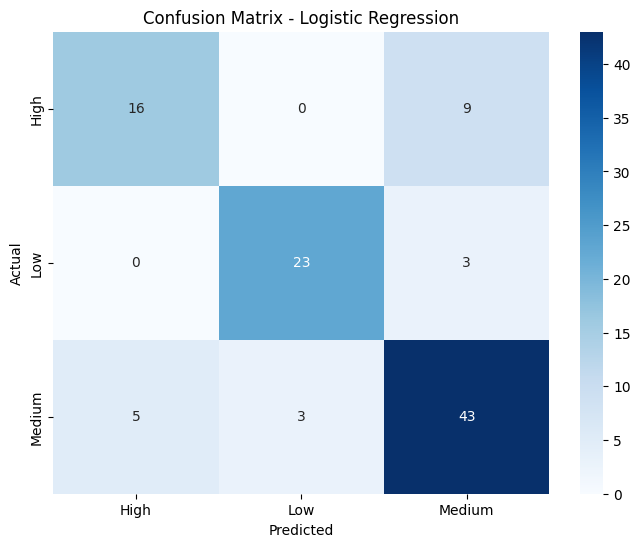

In [137]:
cm = confusion_matrix(y_test, y_pred_lgr)
cm_df = pd.DataFrame(cm, 
                     index=['High', 'Low', 'Medium'], 
                     columns=['High', 'Low', 'Medium'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [138]:
# ROC and AUC Analysis for Multi-class Classification
print("ROC CURVE AND AUC ANALYSIS")
print("="*50)

# Get prediction probabilities for all classes
y_pred_proba = LgR.predict_proba(X_test)
classes = LgR.classes_
n_classes = len(classes)

print(f"Classes: {classes}")
print(f"Prediction probabilities shape: {y_pred_proba.shape}")

ROC CURVE AND AUC ANALYSIS
Classes: ['High' 'Low' 'Medium']
Prediction probabilities shape: (102, 3)


In [139]:
# Convert multi-class to binary format for ROC analysis
y_test_bin = label_binarize(y_test, classes=classes)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and AUC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [140]:
# Print AUC scores
print("\nAUC SCORES:")
print("-" * 30)
for i, class_name in enumerate(classes):
    print(f"{class_name:8} : {roc_auc[i]:.4f}")
print(f"{'Micro-avg':8} : {roc_auc['micro']:.4f}")


AUC SCORES:
------------------------------
High     : 0.9216
Low      : 0.9722
Medium   : 0.8543
Micro-avg : 0.9249


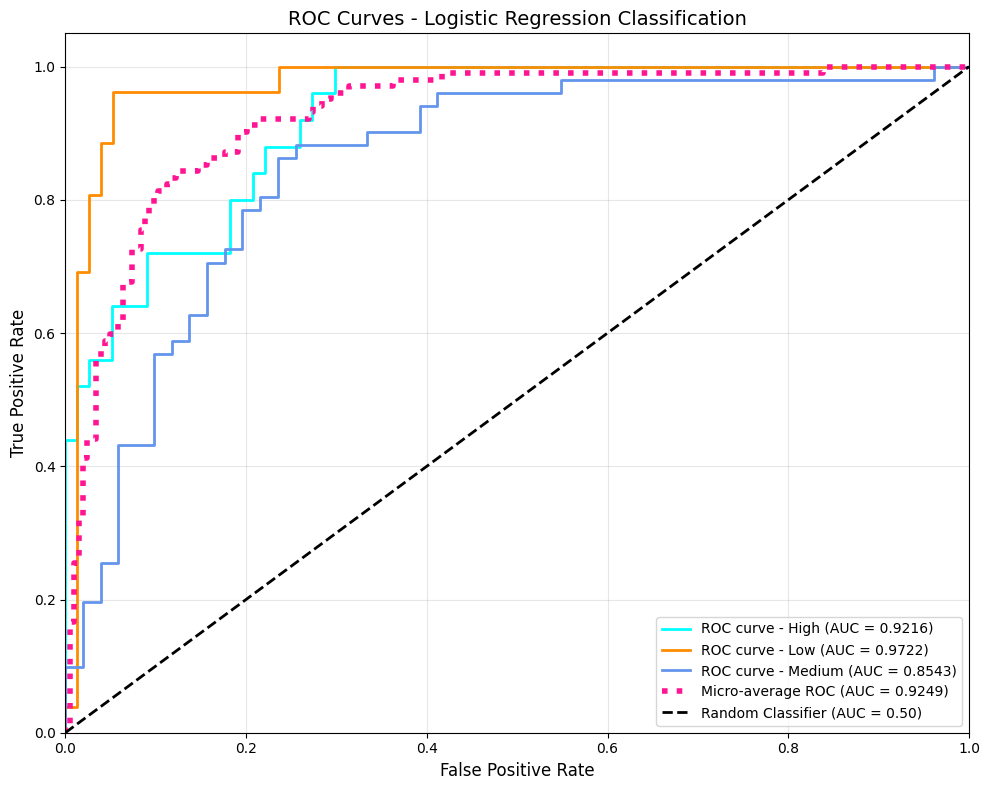

In [141]:
# Plot ROC curves
plt.figure(figsize=(10, 8))

# Colors for different classes
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

# Plot ROC curve for each class
for i, color, class_name in zip(range(n_classes), colors, classes):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve - {class_name} (AUC = {roc_auc[i]:.4f})')

# Plot micro-average ROC curve
plt.plot(fpr["micro"], tpr["micro"],
         label=f'Micro-average ROC (AUC = {roc_auc["micro"]:.4f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.50)')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Logistic Regression Classification', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [142]:
# Calculate overall AUC scores using different methods
auc_ovr = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
auc_ovo = roc_auc_score(y_test, y_pred_proba, multi_class='ovo', average='weighted')

print("\nOVERALL AUC SCORES:")
print("-" * 30)
print(f"One-vs-Rest (Weighted) : {auc_ovr:.4f}")
print(f"One-vs-One (Weighted)  : {auc_ovo:.4f}")
print(f"Micro-average          : {roc_auc['micro']:.4f}")


OVERALL AUC SCORES:
------------------------------
One-vs-Rest (Weighted) : 0.9008
One-vs-One (Weighted)  : 0.9152
Micro-average          : 0.9249


#### Random Forest Classifier

In [143]:
RFC = RandomForestClassifier(
    random_state=42,
    verbose=1  # Shows training progress
)
RFC

RandomForestClassifier(random_state=42, verbose=1)

In [144]:
%%time
RFC.fit(X_train, y_train)

CPU times: total: 312 ms
Wall time: 312 ms


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


RandomForestClassifier(random_state=42, verbose=1)

In [145]:
y_pred_rfc = RFC.predict(X_test)
y_pred_rfc

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array(['Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'Medium', 'High', 'Low', 'Medium', 'Medium',
       'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'High',
       'Medium', 'Low', 'High', 'Low', 'Medium', 'High', 'Low', 'High',
       'Medium', 'High', 'Medium', 'Medium', 'Medium', 'High', 'Low',
       'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'High',
       'Medium', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Low',
       'High', 'High', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'High', 'Medium', 'Medium', 'High', 'High', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'High', 'Low', 'Low', 'Medium', 'Low', 'High', 'Low', 'Medium',
       'Medi

In [146]:
y_test

399       Low
503    Medium
27        Low
119    Medium
492    Medium
        ...  
156       Low
4        High
20        Low
70     Medium
314    Medium
Name: MEDV_Class, Length: 102, dtype: object

In [ ]:
accuracy_RFC = accuracy_score(y_test, y_pred_rfc)
precision_RFC = precision_score(y_test, y_pred_rfc, average='weighted')
recall_RFC = recall_score(y_test, y_pred_rfc, average='weighted')
f1_RFC = f1_score(y_test, y_pred_rfc, average='weighted')

# Save model if better
save_model_if_better_classification(
    model_name="Random Forest Classifier",
    model=RFC,
    scaler=scaler,
    scaler_name=scaler_name,
    accuracy=accuracy_RFC,
    precision=precision_RFC,
    recall=recall_RFC,
    f1=f1_RFC,
    parameters=RFC.get_params()
)

Random Forest Classifier (robust): First time training - saving model
    New model saved to: saved_models_classification\random_forest_classifier_robust_20250713_160845.pkl
    New scaler saved to: saved_models_classification\random_forest_classifier_scaler_robust_20250713_160845.pkl


True

In [148]:
print("RANDOM FOREST CLASSIFICATION RESULTS")
print("="*50)
print(f"Accuracy:  {accuracy_RFC:.4f}")
print(f"Precision: {precision_RFC:.4f}")
print(f"Recall:    {recall_RFC:.4f}")
print(f"F1-Score:  {f1_RFC:.4f}")

RANDOM FOREST CLASSIFICATION RESULTS
Accuracy:  0.8725
Precision: 0.8787
Recall:    0.8725
F1-Score:  0.8691


In [149]:
print("\nDETAILED CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_test, y_pred_rfc))


DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

        High       0.94      0.68      0.79        25
         Low       0.89      0.96      0.93        26
      Medium       0.84      0.92      0.88        51

    accuracy                           0.87       102
   macro avg       0.89      0.85      0.87       102
weighted avg       0.88      0.87      0.87       102



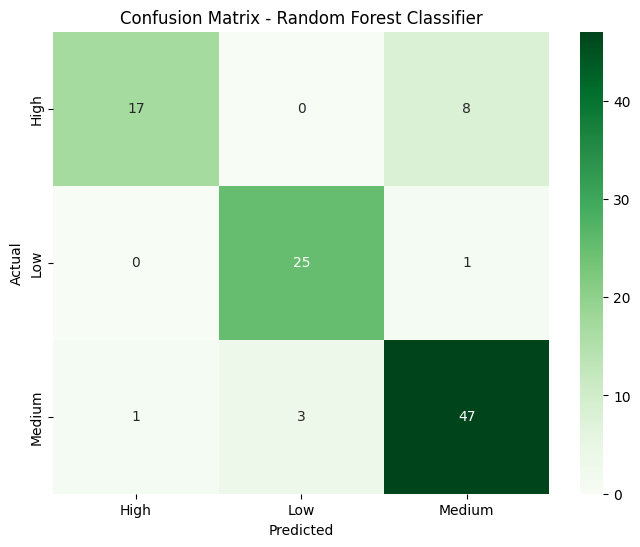

In [150]:
cm_rfc = confusion_matrix(y_test, y_pred_rfc)
cm_rfc_df = pd.DataFrame(cm_rfc, 
                         index=['High', 'Low', 'Medium'], 
                         columns=['High', 'Low', 'Medium'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rfc_df, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'])
plt.title('Confusion Matrix - Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [151]:
# ROC and AUC Analysis for Random Forest Classifier
print("ROC CURVE AND AUC ANALYSIS - RANDOM FOREST")
print("="*50)

# Get prediction probabilities for all classes
y_pred_proba_rfc = RFC.predict_proba(X_test)
classes_rfc = RFC.classes_
n_classes_rfc = len(classes_rfc)

print(f"Classes: {classes_rfc}")
print(f"Prediction probabilities shape: {y_pred_proba_rfc.shape}")

ROC CURVE AND AUC ANALYSIS - RANDOM FOREST
Classes: ['High' 'Low' 'Medium']
Prediction probabilities shape: (102, 3)


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


In [152]:
# Convert multi-class to binary format for ROC analysis
y_test_bin_rfc = label_binarize(y_test, classes=classes_rfc)

# Compute ROC curve and AUC for each class
fpr_rfc = dict()
tpr_rfc = dict()
roc_auc_rfc = dict()

for i in range(n_classes_rfc):
    fpr_rfc[i], tpr_rfc[i], _ = roc_curve(y_test_bin_rfc[:, i], y_pred_proba_rfc[:, i])
    roc_auc_rfc[i] = auc(fpr_rfc[i], tpr_rfc[i])

# Compute micro-average ROC curve and AUC
fpr_rfc["micro"], tpr_rfc["micro"], _ = roc_curve(y_test_bin_rfc.ravel(), y_pred_proba_rfc.ravel())
roc_auc_rfc["micro"] = auc(fpr_rfc["micro"], tpr_rfc["micro"])

In [153]:
# Print AUC scores for Random Forest
print("\nAUC SCORES - RANDOM FOREST:")
print("-" * 30)
for i, class_name in enumerate(classes_rfc):
    print(f"{class_name:8} : {roc_auc_rfc[i]:.4f}")
print(f"{'Micro-avg':8} : {roc_auc_rfc['micro']:.4f}")


AUC SCORES - RANDOM FOREST:
------------------------------
High     : 0.9629
Low      : 0.9696
Medium   : 0.9216
Micro-avg : 0.9584


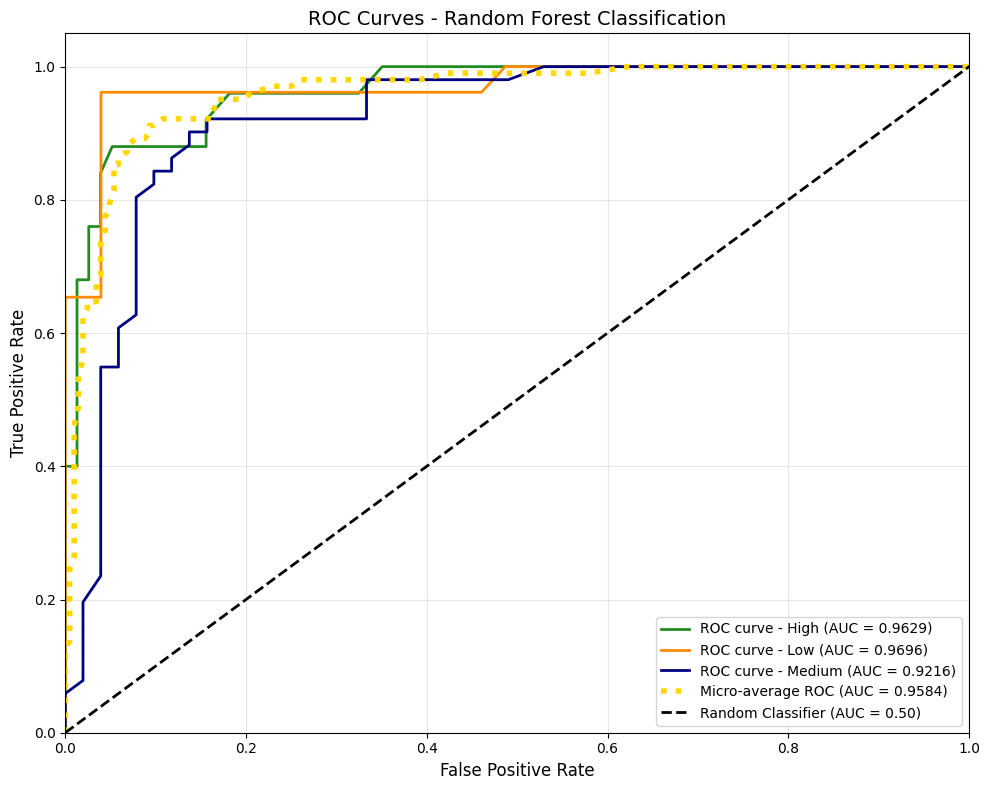

In [154]:
# Plot ROC curves for Random Forest
plt.figure(figsize=(10, 8))

# Colors for different classes
colors = cycle(['forestgreen', 'darkorange', 'navy'])

# Plot ROC curve for each class
for i, color, class_name in zip(range(n_classes_rfc), colors, classes_rfc):
    plt.plot(fpr_rfc[i], tpr_rfc[i], color=color, lw=2,
             label=f'ROC curve - {class_name} (AUC = {roc_auc_rfc[i]:.4f})')

# Plot micro-average ROC curve
plt.plot(fpr_rfc["micro"], tpr_rfc["micro"],
         label=f'Micro-average ROC (AUC = {roc_auc_rfc["micro"]:.4f})',
         color='gold', linestyle=':', linewidth=4)

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.50)')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Random Forest Classification', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [155]:
# Calculate overall AUC scores using different methods for Random Forest
auc_ovr_rfc = roc_auc_score(y_test, y_pred_proba_rfc, multi_class='ovr', average='weighted')
auc_ovo_rfc = roc_auc_score(y_test, y_pred_proba_rfc, multi_class='ovo', average='weighted')

print("\nOVERALL AUC SCORES - RANDOM FOREST:")
print("-" * 30)
print(f"One-vs-Rest (Weighted) : {auc_ovr_rfc:.4f}")
print(f"One-vs-One (Weighted)  : {auc_ovo_rfc:.4f}")
print(f"Micro-average          : {roc_auc_rfc['micro']:.4f}")


OVERALL AUC SCORES - RANDOM FOREST:
------------------------------
One-vs-Rest (Weighted) : 0.9439
One-vs-One (Weighted)  : 0.9512
Micro-average          : 0.9584



FEATURE IMPORTANCE - RANDOM FOREST CLASSIFIER (TOP 10)
    feature  importance
5        RM    0.226036
12    LSTAT    0.184592
4       NOX    0.094094
0      CRIM    0.092707
7       DIS    0.091344
2     INDUS    0.065766
6       AGE    0.057235
11        B    0.051168
10  PTRATIO    0.049195
9       TAX    0.042012


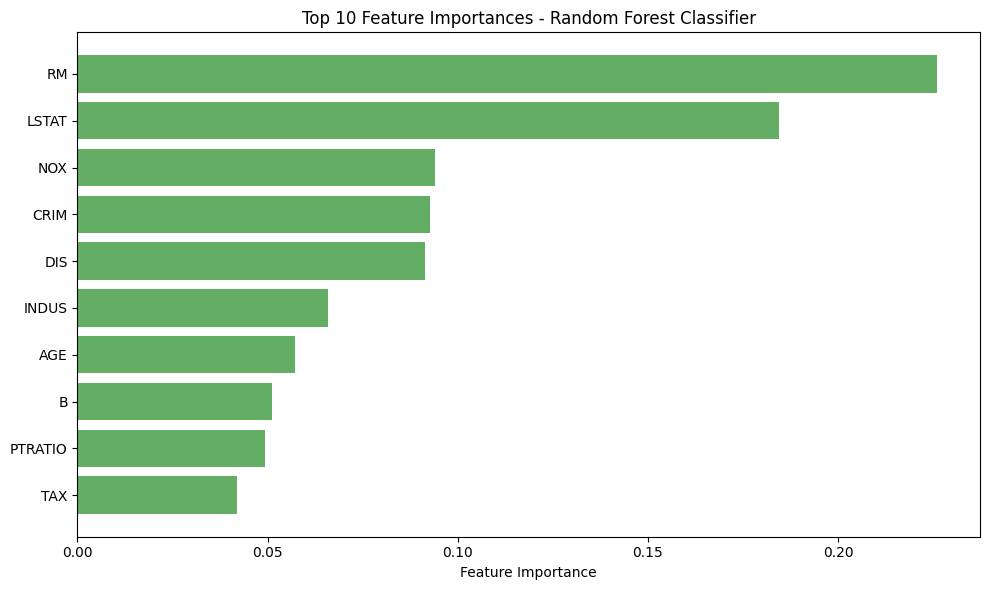

In [156]:
feature_names = boston.drop(columns=['MEDV', 'MEDV_Class']).columns

feature_importance_rfc = pd.DataFrame({
    'feature': feature_names,
    'importance': RFC.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFEATURE IMPORTANCE - RANDOM FOREST CLASSIFIER (TOP 10)")
print("="*60)
print(feature_importance_rfc.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance_rfc.head(10)
plt.barh(range(len(top_features)), top_features['importance'], color='forestgreen', alpha=0.7)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances - Random Forest Classifier')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Support Vector Machine Classifier

In [157]:
SVC_model = SVC(
    random_state=42,
    verbose=True,  # Shows training progress
    probability=True  # Enable probability prediction for ROC analysis
)
SVC_model

SVC(probability=True, random_state=42, verbose=True)

In [158]:
%%time
SVC_model.fit(X_train, y_train)

[LibSVM]CPU times: total: 46.9 ms
Wall time: 45.8 ms


SVC(probability=True, random_state=42, verbose=True)

In [159]:
y_pred_svc = SVC_model.predict(X_test)
y_pred_svc

array(['Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'High', 'High', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'High', 'Low', 'Medium', 'Medium', 'Medium',
       'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'High', 'High',
       'Medium', 'Low', 'High', 'Low', 'Medium', 'High', 'Medium', 'High',
       'Medium', 'High', 'Medium', 'Medium', 'Medium', 'High', 'Low',
       'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'High',
       'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Low',
       'High', 'High', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'High', 'Medium', 'Medium', 'High', 'High', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'High', 'High', 'Low', 'Medium',
       'High', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium',
      

In [160]:
y_test

399       Low
503    Medium
27        Low
119    Medium
492    Medium
        ...  
156       Low
4        High
20        Low
70     Medium
314    Medium
Name: MEDV_Class, Length: 102, dtype: object

In [ ]:
accuracy_SVC = accuracy_score(y_test, y_pred_svc)
precision_SVC = precision_score(y_test, y_pred_svc, average='weighted')
recall_SVC = recall_score(y_test, y_pred_svc, average='weighted')
f1_SVC = f1_score(y_test, y_pred_svc, average='weighted')

# Save model if better
save_model_if_better_classification(
    model_name="SVM Classifier",
    model=SVC_model,
    scaler=scaler,
    scaler_name=scaler_name,
    accuracy=accuracy_SVC,
    precision=precision_SVC,
    recall=recall_SVC,
    f1=f1_SVC,
    parameters=SVC_model.get_params()
)

SVM Classifier (robust): First time training - saving model
    New model saved to: saved_models_classification\svm_classifier_robust_20250713_160846.pkl
    New scaler saved to: saved_models_classification\svm_classifier_scaler_robust_20250713_160846.pkl


True

In [162]:
print("SVM CLASSIFICATION RESULTS")
print("="*50)
print(f"Accuracy:  {accuracy_SVC:.4f}")
print(f"Precision: {precision_SVC:.4f}")
print(f"Recall:    {recall_SVC:.4f}")
print(f"F1-Score:  {f1_SVC:.4f}")

SVM CLASSIFICATION RESULTS
Accuracy:  0.7549
Precision: 0.7660
Recall:    0.7549
F1-Score:  0.7538


In [163]:
print("\nDETAILED CLASSIFICATION REPORT")
print("="*50)
print(classification_report(y_test, y_pred_svc))


DETAILED CLASSIFICATION REPORT
              precision    recall  f1-score   support

        High       0.73      0.64      0.68        25
         Low       0.90      0.69      0.78        26
      Medium       0.72      0.84      0.77        51

    accuracy                           0.75       102
   macro avg       0.78      0.73      0.75       102
weighted avg       0.77      0.75      0.75       102



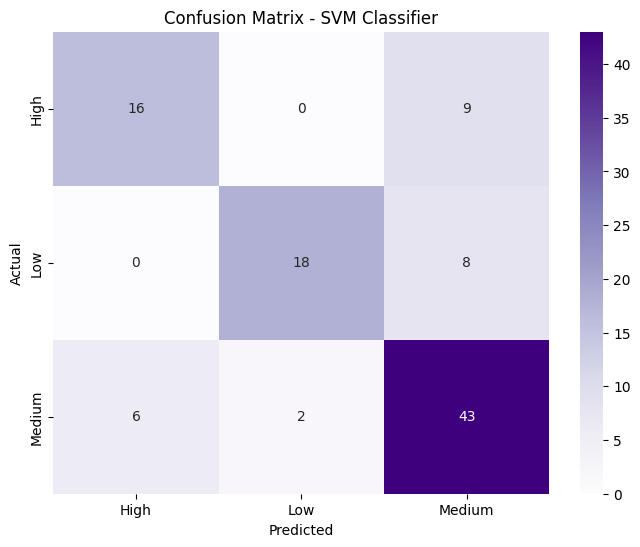

In [164]:
cm_svc = confusion_matrix(y_test, y_pred_svc)
cm_svc_df = pd.DataFrame(cm_svc, 
                         index=['High', 'Low', 'Medium'], 
                         columns=['High', 'Low', 'Medium'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svc_df, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'])
plt.title('Confusion Matrix - SVM Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [165]:
# ROC and AUC Analysis for SVM Classifier
print("ROC CURVE AND AUC ANALYSIS - SVM CLASSIFIER")
print("="*50)

# Get prediction probabilities for all classes
y_pred_proba_svc = SVC_model.predict_proba(X_test)
classes_svc = SVC_model.classes_
n_classes_svc = len(classes_svc)

print(f"Classes: {classes_svc}")
print(f"Prediction probabilities shape: {y_pred_proba_svc.shape}")

ROC CURVE AND AUC ANALYSIS - SVM CLASSIFIER
Classes: ['High' 'Low' 'Medium']
Prediction probabilities shape: (102, 3)


In [166]:
# Convert multi-class to binary format for ROC analysis
y_test_bin_svc = label_binarize(y_test, classes=classes_svc)

# Compute ROC curve and AUC for each class
fpr_svc = dict()
tpr_svc = dict()
roc_auc_svc = dict()

for i in range(n_classes_svc):
    fpr_svc[i], tpr_svc[i], _ = roc_curve(y_test_bin_svc[:, i], y_pred_proba_svc[:, i])
    roc_auc_svc[i] = auc(fpr_svc[i], tpr_svc[i])

# Compute micro-average ROC curve and AUC
fpr_svc["micro"], tpr_svc["micro"], _ = roc_curve(y_test_bin_svc.ravel(), y_pred_proba_svc.ravel())
roc_auc_svc["micro"] = auc(fpr_svc["micro"], tpr_svc["micro"])

In [167]:
# Print AUC scores for SVM
print("\nAUC SCORES - SVM CLASSIFIER:")
print("-" * 30)
for i, class_name in enumerate(classes_svc):
    print(f"{class_name:8} : {roc_auc_svc[i]:.4f}")
print(f"{'Micro-avg':8} : {roc_auc_svc['micro']:.4f}")


AUC SCORES - SVM CLASSIFIER:
------------------------------
High     : 0.9283
Low      : 0.9732
Medium   : 0.8539
Micro-avg : 0.9265


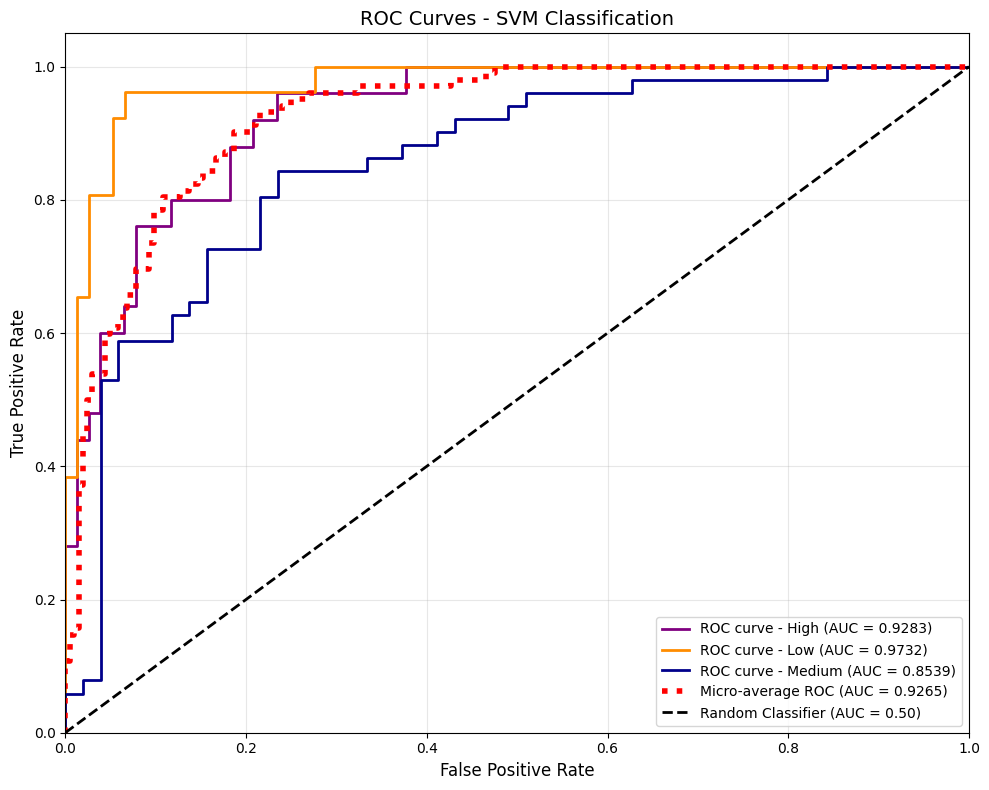

In [168]:
# Plot ROC curves for SVM
plt.figure(figsize=(10, 8))

# Colors for different classes
colors = cycle(['purple', 'darkorange', 'darkblue'])

# Plot ROC curve for each class
for i, color, class_name in zip(range(n_classes_svc), colors, classes_svc):
    plt.plot(fpr_svc[i], tpr_svc[i], color=color, lw=2,
             label=f'ROC curve - {class_name} (AUC = {roc_auc_svc[i]:.4f})')

# Plot micro-average ROC curve
plt.plot(fpr_svc["micro"], tpr_svc["micro"],
         label=f'Micro-average ROC (AUC = {roc_auc_svc["micro"]:.4f})',
         color='red', linestyle=':', linewidth=4)

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.50)')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - SVM Classification', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [169]:
# Calculate overall AUC scores using different methods for SVM
auc_ovr_svc = roc_auc_score(y_test, y_pred_proba_svc, multi_class='ovr', average='weighted')
auc_ovo_svc = roc_auc_score(y_test, y_pred_proba_svc, multi_class='ovo', average='weighted')

print("\nOVERALL AUC SCORES - SVM CLASSIFIER:")
print("-" * 30)
print(f"One-vs-Rest (Weighted) : {auc_ovr_svc:.4f}")
print(f"One-vs-One (Weighted)  : {auc_ovo_svc:.4f}")
print(f"Micro-average          : {roc_auc_svc['micro']:.4f}")


OVERALL AUC SCORES - SVM CLASSIFIER:
------------------------------
One-vs-Rest (Weighted) : 0.9025
One-vs-One (Weighted)  : 0.9173
Micro-average          : 0.9265


### Bagging Ensamble Learning

#### Tuning Logistic Regression

In [170]:
# Create base Logistic Regression
base_lgr = LogisticRegression(random_state=42, max_iter=1000)

# Create Bagging Classifier
bagging_lgr_clf = BaggingClassifier(
    estimator=base_lgr,
    n_estimators=100,
    random_state=42,
    verbose=1,
    n_jobs=-1,
    bootstrap_features=True,
    max_features=0.8
)

bagging_lgr_clf

BaggingClassifier(bootstrap_features=True,
                  estimator=LogisticRegression(max_iter=1000, random_state=42),
                  max_features=0.8, n_estimators=100, n_jobs=-1,
                  random_state=42, verbose=1)

In [171]:
%%time
bagging_lgr_clf.fit(X_train, y_train)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.


CPU times: total: 0 ns
Wall time: 460 ms


[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.2s remaining:    0.9s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.4s finished


BaggingClassifier(bootstrap_features=True,
                  estimator=LogisticRegression(max_iter=1000, random_state=42),
                  max_features=0.8, n_estimators=100, n_jobs=-1,
                  random_state=42, verbose=1)

In [172]:
y_pred_bagging_lgr = bagging_lgr_clf.predict(X_test)
y_pred_bagging_lgr

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished


array(['Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'High', 'High', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'High', 'Medium',
       'Medium', 'Low', 'High', 'Low', 'Medium', 'High', 'Low', 'High',
       'Medium', 'High', 'Medium', 'Medium', 'Medium', 'High', 'Low',
       'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'High',
       'Medium', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Low',
       'High', 'High', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'High', 'Medium', 'Low', 'High', 'High', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'High', 'Medium', 'Low', 'Medium', 'High',
       'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
     

In [173]:
y_test

399       Low
503    Medium
27        Low
119    Medium
492    Medium
        ...  
156       Low
4        High
20        Low
70     Medium
314    Medium
Name: MEDV_Class, Length: 102, dtype: object

In [ ]:
accuracy_Bagging_LgR = accuracy_score(y_test, y_pred_bagging_lgr)
precision_Bagging_LgR = precision_score(y_test, y_pred_bagging_lgr, average='weighted')
recall_Bagging_LgR = recall_score(y_test, y_pred_bagging_lgr, average='weighted')
f1_Bagging_LgR = f1_score(y_test, y_pred_bagging_lgr, average='weighted')

# Save model if better
save_model_if_better_classification(
    model_name="Bagging Logistic Regression",
    model=bagging_lgr_clf,
    scaler=scaler,
    scaler_name=scaler_name,
    accuracy=accuracy_Bagging_LgR,
    precision=precision_Bagging_LgR,
    recall=recall_Bagging_LgR,
    f1=f1_Bagging_LgR,
    parameters=bagging_lgr_clf.get_params()
)

Bagging Logistic Regression (robust): First time training - saving model
    New model saved to: saved_models_classification\bagging_logistic_regression_robust_20250713_160847.pkl
    New scaler saved to: saved_models_classification\bagging_logistic_regression_scaler_robust_20250713_160847.pkl


True

In [175]:
print("BAGGING LOGISTIC REGRESSION CLASSIFICATION RESULTS")
print("="*60)
print(f"Accuracy:  {accuracy_Bagging_LgR:.4f}")
print(f"Precision: {precision_Bagging_LgR:.4f}")
print(f"Recall:    {recall_Bagging_LgR:.4f}")
print(f"F1-Score:  {f1_Bagging_LgR:.4f}")

BAGGING LOGISTIC REGRESSION CLASSIFICATION RESULTS
Accuracy:  0.7745
Precision: 0.7783
Recall:    0.7745
F1-Score:  0.7715


In [176]:
print("\nDETAILED CLASSIFICATION REPORT - BAGGING LOGISTIC REGRESSION")
print("="*60)
print(classification_report(y_test, y_pred_bagging_lgr))


DETAILED CLASSIFICATION REPORT - BAGGING LOGISTIC REGRESSION
              precision    recall  f1-score   support

        High       0.79      0.60      0.68        25
         Low       0.84      0.81      0.82        26
      Medium       0.74      0.84      0.79        51

    accuracy                           0.77       102
   macro avg       0.79      0.75      0.76       102
weighted avg       0.78      0.77      0.77       102



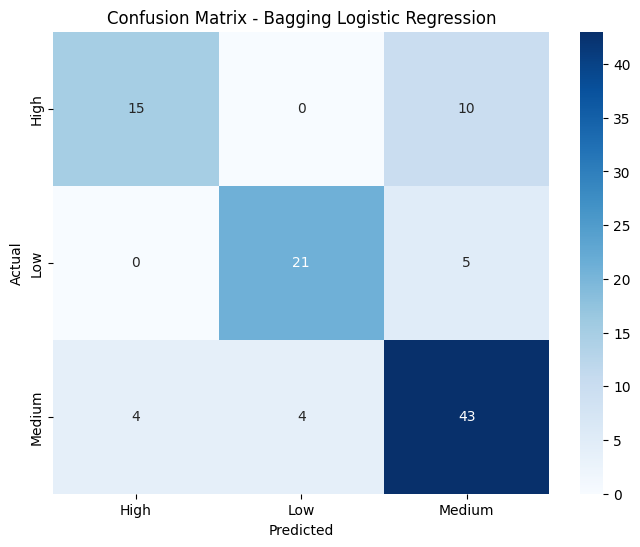

In [177]:
# Confusion Matrix
cm_bagging_lgr = confusion_matrix(y_test, y_pred_bagging_lgr)
cm_bagging_lgr_df = pd.DataFrame(cm_bagging_lgr, 
                                index=['High', 'Low', 'Medium'], 
                                columns=['High', 'Low', 'Medium'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_bagging_lgr_df, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'])
plt.title('Confusion Matrix - Bagging Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [178]:
# ROC and AUC Analysis for Bagging Logistic Regression
print("ROC CURVE AND AUC ANALYSIS - BAGGING LOGISTIC REGRESSION")
print("="*60)

# Get prediction probabilities for all classes
y_pred_proba_bagging_lgr = bagging_lgr_clf.predict_proba(X_test)
classes_bagging_lgr = bagging_lgr_clf.classes_
n_classes_bagging_lgr = len(classes_bagging_lgr)

print(f"Classes: {classes_bagging_lgr}")
print(f"Prediction probabilities shape: {y_pred_proba_bagging_lgr.shape}")

ROC CURVE AND AUC ANALYSIS - BAGGING LOGISTIC REGRESSION
Classes: ['High' 'Low' 'Medium']
Prediction probabilities shape: (102, 3)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished


In [179]:
# Convert multi-class to binary format for ROC analysis
y_test_bin_bagging_lgr = label_binarize(y_test, classes=classes_bagging_lgr)

# Compute ROC curve and AUC for each class
fpr_bagging_lgr = dict()
tpr_bagging_lgr = dict()
roc_auc_bagging_lgr = dict()

for i in range(n_classes_bagging_lgr):
    fpr_bagging_lgr[i], tpr_bagging_lgr[i], _ = roc_curve(y_test_bin_bagging_lgr[:, i], y_pred_proba_bagging_lgr[:, i])
    roc_auc_bagging_lgr[i] = auc(fpr_bagging_lgr[i], tpr_bagging_lgr[i])

# Compute micro-average ROC curve and AUC
fpr_bagging_lgr["micro"], tpr_bagging_lgr["micro"], _ = roc_curve(y_test_bin_bagging_lgr.ravel(), y_pred_proba_bagging_lgr.ravel())
roc_auc_bagging_lgr["micro"] = auc(fpr_bagging_lgr["micro"], tpr_bagging_lgr["micro"])

In [180]:
# Print AUC scores for Bagging Logistic Regression
print("\nAUC SCORES - BAGGING LOGISTIC REGRESSION:")
print("-" * 40)
for i, class_name in enumerate(classes_bagging_lgr):
    print(f"{class_name:8} : {roc_auc_bagging_lgr[i]:.4f}")
print(f"{'Micro-avg':8} : {roc_auc_bagging_lgr['micro']:.4f}")


AUC SCORES - BAGGING LOGISTIC REGRESSION:
----------------------------------------
High     : 0.9252
Low      : 0.9631
Medium   : 0.8489
Micro-avg : 0.9230


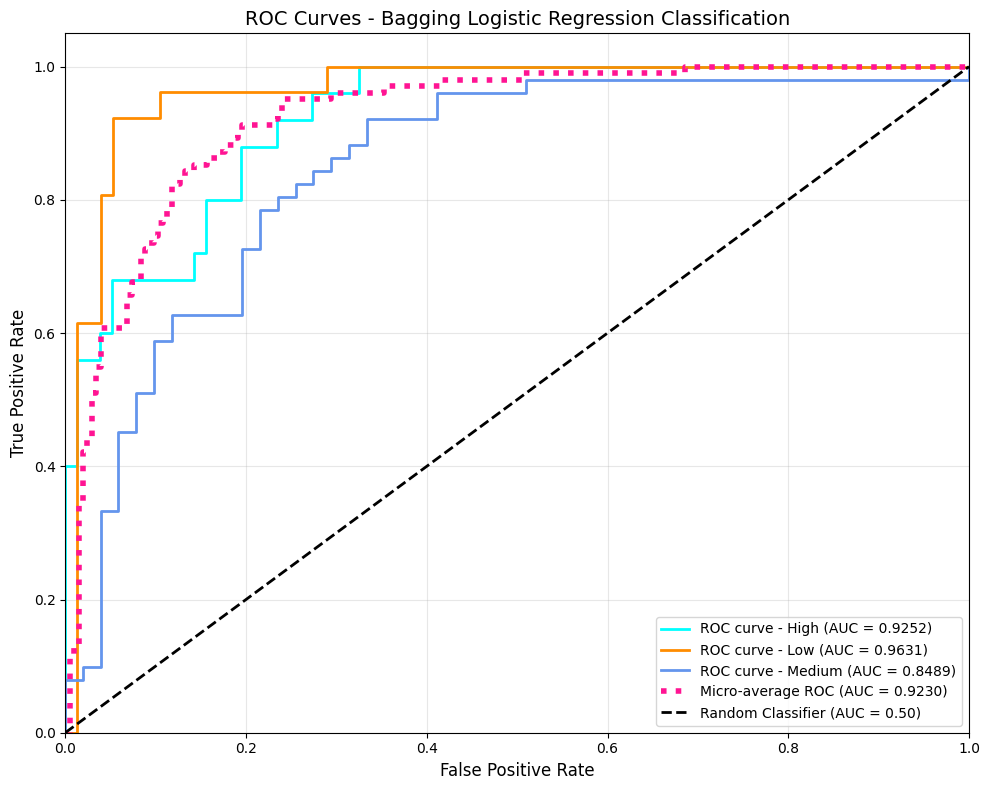

In [181]:
# Plot ROC curves for Bagging Logistic Regression
plt.figure(figsize=(10, 8))

# Colors for different classes
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])

# Plot ROC curve for each class
for i, color, class_name in zip(range(n_classes_bagging_lgr), colors, classes_bagging_lgr):
    plt.plot(fpr_bagging_lgr[i], tpr_bagging_lgr[i], color=color, lw=2,
             label=f'ROC curve - {class_name} (AUC = {roc_auc_bagging_lgr[i]:.4f})')

# Plot micro-average ROC curve
plt.plot(fpr_bagging_lgr["micro"], tpr_bagging_lgr["micro"],
         label=f'Micro-average ROC (AUC = {roc_auc_bagging_lgr["micro"]:.4f})',
         color='deeppink', linestyle=':', linewidth=4)

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.50)')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Bagging Logistic Regression Classification', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [182]:
# Calculate overall AUC scores
auc_ovr_bagging_lgr = roc_auc_score(y_test, y_pred_proba_bagging_lgr, multi_class='ovr', average='weighted')
auc_ovo_bagging_lgr = roc_auc_score(y_test, y_pred_proba_bagging_lgr, multi_class='ovo', average='weighted')

print("\nOVERALL AUC SCORES - BAGGING LOGISTIC REGRESSION:")
print("-" * 40)
print(f"One-vs-Rest (Weighted) : {auc_ovr_bagging_lgr:.4f}")
print(f"One-vs-One (Weighted)  : {auc_ovo_bagging_lgr:.4f}")
print(f"Micro-average          : {roc_auc_bagging_lgr['micro']:.4f}")


OVERALL AUC SCORES - BAGGING LOGISTIC REGRESSION:
----------------------------------------
One-vs-Rest (Weighted) : 0.8967
One-vs-One (Weighted)  : 0.9116
Micro-average          : 0.9230


#### Tuning Random Forest Classifier

In [183]:
# Create base Random Forest Classifier
base_rfc = RandomForestClassifier(random_state=42, verbose=1)

# Create Bagging Classifier with Random Forest
bagging_rfc_clf = BaggingClassifier(
    estimator=base_rfc,
    n_estimators=50,
    random_state=42,
    verbose=1,
    n_jobs=-1,
    bootstrap_features=True,
    max_features=0.8,
    max_samples=0.8
)

bagging_rfc_clf

BaggingClassifier(bootstrap_features=True,
                  estimator=RandomForestClassifier(random_state=42, verbose=1),
                  max_features=0.8, max_samples=0.8, n_estimators=50, n_jobs=-1,
                  random_state=42, verbose=1)

In [184]:
%%time
bagging_rfc_clf.fit(X_train, y_train)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.9s remaining:    5.9s


CPU times: total: 672 ms
Wall time: 2.5 s


[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    2.4s finished


BaggingClassifier(bootstrap_features=True,
                  estimator=RandomForestClassifier(random_state=42, verbose=1),
                  max_features=0.8, max_samples=0.8, n_estimators=50, n_jobs=-1,
                  random_state=42, verbose=1)

In [185]:
y_pred_bagging_rfc = bagging_rfc_clf.predict(X_test)
y_pred_bagging_rfc

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.6s remaining:    2.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.8s finished


array(['Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'High', 'High', 'Medium', 'High', 'Low', 'Medium', 'Medium',
       'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'High',
       'Medium', 'Low', 'High', 'Low', 'Medium', 'High', 'Low', 'High',
       'Medium', 'High', 'Medium', 'Medium', 'High', 'High', 'Low', 'Low',
       'Medium', 'Medium', 'Medium', 'High', 'Medium', 'High', 'Medium',
       'Low', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Low', 'High',
       'High', 'Medium', 'High', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'Medium', 'High', 'High', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'High',
       'Low', 'Low', 'Medium', 'Low', 'High', 'Low', 'Medium', 'Medium'],
  

In [186]:
y_test

399       Low
503    Medium
27        Low
119    Medium
492    Medium
        ...  
156       Low
4        High
20        Low
70     Medium
314    Medium
Name: MEDV_Class, Length: 102, dtype: object

In [ ]:
accuracy_Bagging_RFC = accuracy_score(y_test, y_pred_bagging_rfc)
precision_Bagging_RFC = precision_score(y_test, y_pred_bagging_rfc, average='weighted')
recall_Bagging_RFC = recall_score(y_test, y_pred_bagging_rfc, average='weighted')
f1_Bagging_RFC = f1_score(y_test, y_pred_bagging_rfc, average='weighted')

# Save model if better
save_model_if_better_classification(
    model_name="Bagging Random Forest Classifier",
    model=bagging_rfc_clf,
    scaler=scaler,
    scaler_name=scaler_name,
    accuracy=accuracy_Bagging_RFC,
    precision=precision_Bagging_RFC,
    recall=recall_Bagging_RFC,
    f1=f1_Bagging_RFC,
    parameters=bagging_rfc_clf.get_params()
)

Bagging Random Forest Classifier (robust): First time training - saving model
    New model saved to: saved_models_classification\bagging_random_forest_classifier_robust_20250713_160853.pkl
    New scaler saved to: saved_models_classification\bagging_random_forest_classifier_scaler_robust_20250713_160853.pkl


True

In [188]:
print("BAGGING RANDOM FOREST CLASSIFICATION RESULTS")
print("="*60)
print(f"Accuracy:  {accuracy_Bagging_RFC:.4f}")
print(f"Precision: {precision_Bagging_RFC:.4f}")
print(f"Recall:    {recall_Bagging_RFC:.4f}")
print(f"F1-Score:  {f1_Bagging_RFC:.4f}")

BAGGING RANDOM FOREST CLASSIFICATION RESULTS
Accuracy:  0.8431
Precision: 0.8440
Recall:    0.8431
F1-Score:  0.8406


In [189]:
print("\nDETAILED CLASSIFICATION REPORT - BAGGING RANDOM FOREST")
print("="*60)
print(classification_report(y_test, y_pred_bagging_rfc))


DETAILED CLASSIFICATION REPORT - BAGGING RANDOM FOREST
              precision    recall  f1-score   support

        High       0.85      0.68      0.76        25
         Low       0.89      0.92      0.91        26
      Medium       0.82      0.88      0.85        51

    accuracy                           0.84       102
   macro avg       0.85      0.83      0.84       102
weighted avg       0.84      0.84      0.84       102



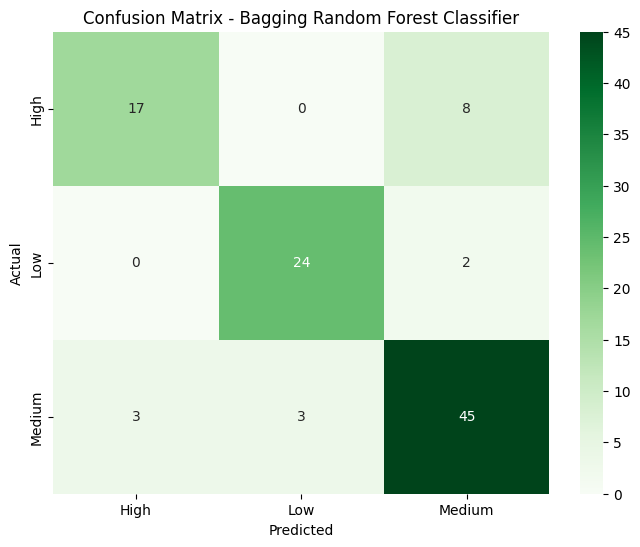

In [190]:
# Confusion Matrix
cm_bagging_rfc = confusion_matrix(y_test, y_pred_bagging_rfc)
cm_bagging_rfc_df = pd.DataFrame(cm_bagging_rfc, 
                                index=['High', 'Low', 'Medium'], 
                                columns=['High', 'Low', 'Medium'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_bagging_rfc_df, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'])
plt.title('Confusion Matrix - Bagging Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [191]:
# ROC and AUC Analysis for Bagging Random Forest Classifier
print("ROC CURVE AND AUC ANALYSIS - BAGGING RANDOM FOREST")
print("="*60)

# Get prediction probabilities for all classes
y_pred_proba_bagging_rfc = bagging_rfc_clf.predict_proba(X_test)
classes_bagging_rfc = bagging_rfc_clf.classes_
n_classes_bagging_rfc = len(classes_bagging_rfc)

print(f"Classes: {classes_bagging_rfc}")
print(f"Prediction probabilities shape: {y_pred_proba_bagging_rfc.shape}")

ROC CURVE AND AUC ANALYSIS - BAGGING RANDOM FOREST


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.6s remaining:    2.0s


Classes: ['High' 'Low' 'Medium']
Prediction probabilities shape: (102, 3)


[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    1.8s finished


In [192]:
# Convert multi-class to binary format for ROC analysis
y_test_bin_bagging_rfc = label_binarize(y_test, classes=classes_bagging_rfc)

# Compute ROC curve and AUC for each class
fpr_bagging_rfc = dict()
tpr_bagging_rfc = dict()
roc_auc_bagging_rfc = dict()

for i in range(n_classes_bagging_rfc):
    fpr_bagging_rfc[i], tpr_bagging_rfc[i], _ = roc_curve(y_test_bin_bagging_rfc[:, i], y_pred_proba_bagging_rfc[:, i])
    roc_auc_bagging_rfc[i] = auc(fpr_bagging_rfc[i], tpr_bagging_rfc[i])

# Compute micro-average ROC curve and AUC
fpr_bagging_rfc["micro"], tpr_bagging_rfc["micro"], _ = roc_curve(y_test_bin_bagging_rfc.ravel(), y_pred_proba_bagging_rfc.ravel())
roc_auc_bagging_rfc["micro"] = auc(fpr_bagging_rfc["micro"], tpr_bagging_rfc["micro"])

In [193]:
# Print AUC scores for Bagging Random Forest
print("\nAUC SCORES - BAGGING RANDOM FOREST:")
print("-" * 40)
for i, class_name in enumerate(classes_bagging_rfc):
    print(f"{class_name:8} : {roc_auc_bagging_rfc[i]:.4f}")
print(f"{'Micro-avg':8} : {roc_auc_bagging_rfc['micro']:.4f}")


AUC SCORES - BAGGING RANDOM FOREST:
----------------------------------------
High     : 0.9496
Low      : 0.9686
Medium   : 0.9020
Micro-avg : 0.9493


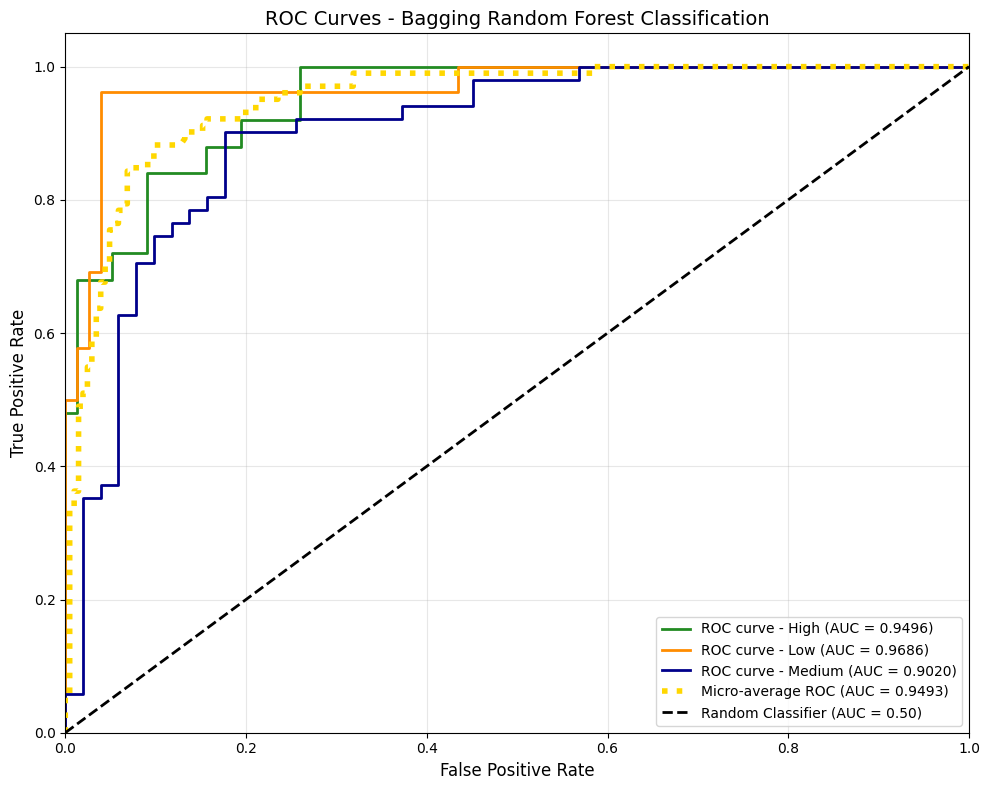

In [194]:
# Plot ROC curves for Bagging Random Forest
plt.figure(figsize=(10, 8))

# Colors for different classes
colors = cycle(['forestgreen', 'darkorange', 'darkblue'])

# Plot ROC curve for each class
for i, color, class_name in zip(range(n_classes_bagging_rfc), colors, classes_bagging_rfc):
    plt.plot(fpr_bagging_rfc[i], tpr_bagging_rfc[i], color=color, lw=2,
             label=f'ROC curve - {class_name} (AUC = {roc_auc_bagging_rfc[i]:.4f})')

# Plot micro-average ROC curve
plt.plot(fpr_bagging_rfc["micro"], tpr_bagging_rfc["micro"],
         label=f'Micro-average ROC (AUC = {roc_auc_bagging_rfc["micro"]:.4f})',
         color='gold', linestyle=':', linewidth=4)

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.50)')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Bagging Random Forest Classification', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [195]:
# Calculate overall AUC scores
auc_ovr_bagging_rfc = roc_auc_score(y_test, y_pred_proba_bagging_rfc, multi_class='ovr', average='weighted')
auc_ovo_bagging_rfc = roc_auc_score(y_test, y_pred_proba_bagging_rfc, multi_class='ovo', average='weighted')

print("\nOVERALL AUC SCORES - BAGGING RANDOM FOREST:")
print("-" * 40)
print(f"One-vs-Rest (Weighted) : {auc_ovr_bagging_rfc:.4f}")
print(f"One-vs-One (Weighted)  : {auc_ovo_bagging_rfc:.4f}")
print(f"Micro-average          : {roc_auc_bagging_rfc['micro']:.4f}")


OVERALL AUC SCORES - BAGGING RANDOM FOREST:
----------------------------------------
One-vs-Rest (Weighted) : 0.9306
One-vs-One (Weighted)  : 0.9399
Micro-average          : 0.9493


#### Tuning Support Vector Machine Classifier

In [196]:
# Create base Support Vector Classifier
base_svc = SVC(random_state=42, probability=True, verbose=True)

# Create Bagging Classifier with SVM
bagging_svc_clf = BaggingClassifier(
    estimator=base_svc,
    n_estimators=50,
    random_state=42,
    verbose=1,
    n_jobs=-1,
    bootstrap_features=True,
    max_features=0.8,
    max_samples=0.8
)

bagging_svc_clf

BaggingClassifier(bootstrap_features=True,
                  estimator=SVC(probability=True, random_state=42,
                                verbose=True),
                  max_features=0.8, max_samples=0.8, n_estimators=50, n_jobs=-1,
                  random_state=42, verbose=1)

In [197]:
%%time
bagging_svc_clf.fit(X_train, y_train)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.1s remaining:    0.4s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.1s finished


CPU times: total: 31.2 ms
Wall time: 215 ms


BaggingClassifier(bootstrap_features=True,
                  estimator=SVC(probability=True, random_state=42,
                                verbose=True),
                  max_features=0.8, max_samples=0.8, n_estimators=50, n_jobs=-1,
                  random_state=42, verbose=1)

In [198]:
y_pred_bagging_svc = bagging_svc_clf.predict(X_test)
y_pred_bagging_svc

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished


array(['Low', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'High', 'High', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'Medium', 'Low', 'High', 'Low', 'Medium', 'Medium', 'Medium',
       'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'High', 'High',
       'Medium', 'Low', 'High', 'Low', 'Medium', 'High', 'Medium', 'High',
       'Medium', 'High', 'Medium', 'Medium', 'Medium', 'High', 'Low',
       'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'High',
       'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Low',
       'High', 'High', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'High', 'Medium', 'Low', 'High', 'High', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'High', 'High', 'Low', 'Medium',
       'High', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium'

In [199]:
y_test

399       Low
503    Medium
27        Low
119    Medium
492    Medium
        ...  
156       Low
4        High
20        Low
70     Medium
314    Medium
Name: MEDV_Class, Length: 102, dtype: object

In [ ]:
accuracy_Bagging_SVC = accuracy_score(y_test, y_pred_bagging_svc)
precision_Bagging_SVC = precision_score(y_test, y_pred_bagging_svc, average='weighted')
recall_Bagging_SVC = recall_score(y_test, y_pred_bagging_svc, average='weighted')
f1_Bagging_SVC = f1_score(y_test, y_pred_bagging_svc, average='weighted')

# Save model if better
save_model_if_better_classification(
    model_name="Bagging SVM Classifier",
    model=bagging_svc_clf,
    scaler=scaler,
    scaler_name=scaler_name,
    accuracy=accuracy_Bagging_SVC,
    precision=precision_Bagging_SVC,
    recall=recall_Bagging_SVC,
    f1=f1_Bagging_SVC,
    parameters=bagging_svc_clf.get_params()
)

Bagging SVM Classifier (robust): First time training - saving model
    New model saved to: saved_models_classification\bagging_svm_classifier_robust_20250713_160859.pkl
    New scaler saved to: saved_models_classification\bagging_svm_classifier_scaler_robust_20250713_160859.pkl


True

In [201]:
print("BAGGING SVM CLASSIFICATION RESULTS")
print("="*60)
print(f"Accuracy:  {accuracy_Bagging_SVC:.4f}")
print(f"Precision: {precision_Bagging_SVC:.4f}")
print(f"Recall:    {recall_Bagging_SVC:.4f}")
print(f"F1-Score:  {f1_Bagging_SVC:.4f}")

BAGGING SVM CLASSIFICATION RESULTS
Accuracy:  0.7451
Precision: 0.7485
Recall:    0.7451
F1-Score:  0.7442


In [202]:
print("\nDETAILED CLASSIFICATION REPORT - BAGGING SVM")
print("="*60)
print(classification_report(y_test, y_pred_bagging_svc))


DETAILED CLASSIFICATION REPORT - BAGGING SVM
              precision    recall  f1-score   support

        High       0.73      0.64      0.68        25
         Low       0.83      0.73      0.78        26
      Medium       0.72      0.80      0.76        51

    accuracy                           0.75       102
   macro avg       0.76      0.72      0.74       102
weighted avg       0.75      0.75      0.74       102



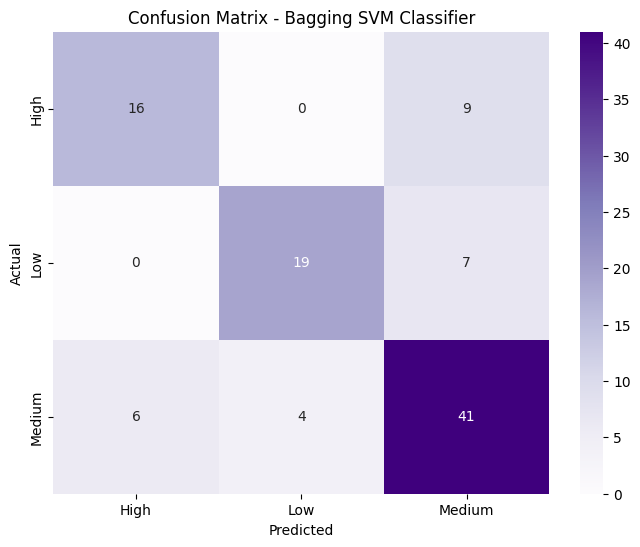

In [203]:
# Confusion Matrix
cm_bagging_svc = confusion_matrix(y_test, y_pred_bagging_svc)
cm_bagging_svc_df = pd.DataFrame(cm_bagging_svc, 
                                index=['High', 'Low', 'Medium'], 
                                columns=['High', 'Low', 'Medium'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_bagging_svc_df, annot=True, fmt='d', cmap='Purples', 
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'])
plt.title('Confusion Matrix - Bagging SVM Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [204]:
# ROC and AUC Analysis for Bagging SVM Classifier
print("ROC CURVE AND AUC ANALYSIS - BAGGING SVM")
print("="*60)

# Get prediction probabilities for all classes
y_pred_proba_bagging_svc = bagging_svc_clf.predict_proba(X_test)
classes_bagging_svc = bagging_svc_clf.classes_
n_classes_bagging_svc = len(classes_bagging_svc)

print(f"Classes: {classes_bagging_svc}")
print(f"Prediction probabilities shape: {y_pred_proba_bagging_svc.shape}")

ROC CURVE AND AUC ANALYSIS - BAGGING SVM
Classes: ['High' 'Low' 'Medium']
Prediction probabilities shape: (102, 3)


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.0s finished


In [205]:
# Convert multi-class to binary format for ROC analysis
y_test_bin_bagging_svc = label_binarize(y_test, classes=classes_bagging_svc)

# Compute ROC curve and AUC for each class
fpr_bagging_svc = dict()
tpr_bagging_svc = dict()
roc_auc_bagging_svc = dict()

for i in range(n_classes_bagging_svc):
    fpr_bagging_svc[i], tpr_bagging_svc[i], _ = roc_curve(y_test_bin_bagging_svc[:, i], y_pred_proba_bagging_svc[:, i])
    roc_auc_bagging_svc[i] = auc(fpr_bagging_svc[i], tpr_bagging_svc[i])

# Compute micro-average ROC curve and AUC
fpr_bagging_svc["micro"], tpr_bagging_svc["micro"], _ = roc_curve(y_test_bin_bagging_svc.ravel(), y_pred_proba_bagging_svc.ravel())
roc_auc_bagging_svc["micro"] = auc(fpr_bagging_svc["micro"], tpr_bagging_svc["micro"])

In [206]:
# Print AUC scores for Bagging SVM
print("\nAUC SCORES - BAGGING SVM:")
print("-" * 40)
for i, class_name in enumerate(classes_bagging_svc):
    print(f"{class_name:8} : {roc_auc_bagging_svc[i]:.4f}")
print(f"{'Micro-avg':8} : {roc_auc_bagging_svc['micro']:.4f}")


AUC SCORES - BAGGING SVM:
----------------------------------------
High     : 0.9325
Low      : 0.9651
Medium   : 0.8551
Micro-avg : 0.9263


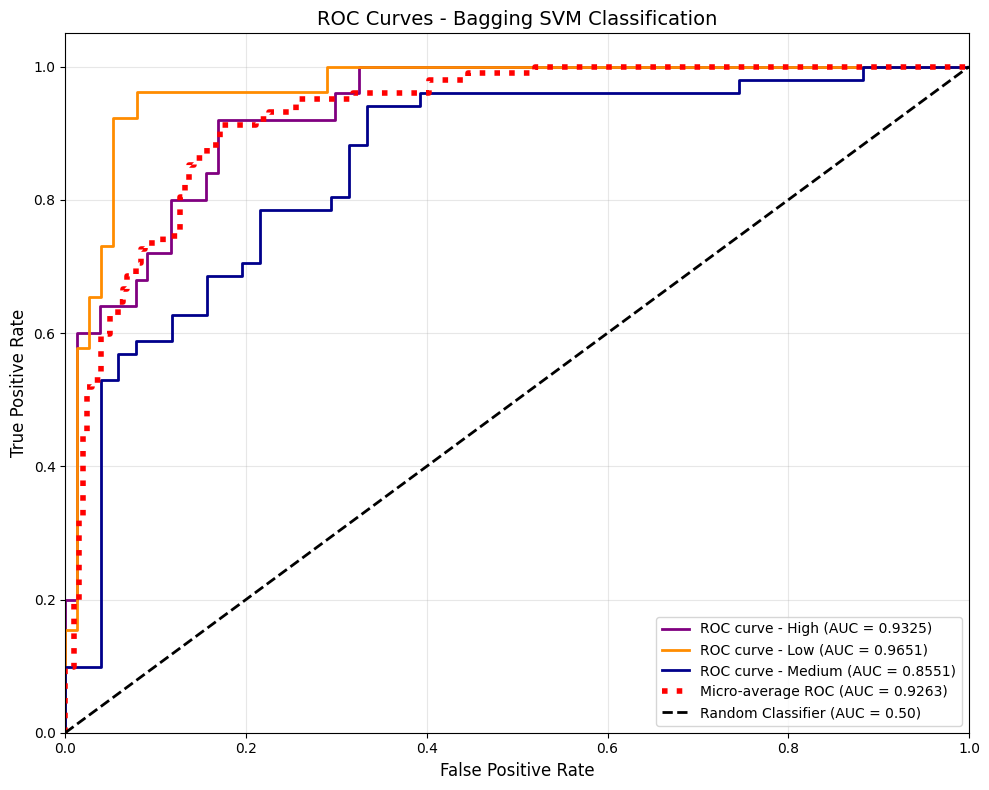

In [207]:
# Plot ROC curves for Bagging SVM
plt.figure(figsize=(10, 8))

# Colors for different classes
colors = cycle(['purple', 'darkorange', 'darkblue'])

# Plot ROC curve for each class
for i, color, class_name in zip(range(n_classes_bagging_svc), colors, classes_bagging_svc):
    plt.plot(fpr_bagging_svc[i], tpr_bagging_svc[i], color=color, lw=2,
             label=f'ROC curve - {class_name} (AUC = {roc_auc_bagging_svc[i]:.4f})')

# Plot micro-average ROC curve
plt.plot(fpr_bagging_svc["micro"], tpr_bagging_svc["micro"],
         label=f'Micro-average ROC (AUC = {roc_auc_bagging_svc["micro"]:.4f})',
         color='red', linestyle=':', linewidth=4)

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.50)')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Bagging SVM Classification', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [208]:
# Calculate overall AUC scores
auc_ovr_bagging_svc = roc_auc_score(y_test, y_pred_proba_bagging_svc, multi_class='ovr', average='weighted')
auc_ovo_bagging_svc = roc_auc_score(y_test, y_pred_proba_bagging_svc, multi_class='ovo', average='weighted')

print("\nOVERALL AUC SCORES - BAGGING SVM:")
print("-" * 40)
print(f"One-vs-Rest (Weighted) : {auc_ovr_bagging_svc:.4f}")
print(f"One-vs-One (Weighted)  : {auc_ovo_bagging_svc:.4f}")
print(f"Micro-average          : {roc_auc_bagging_svc['micro']:.4f}")


OVERALL AUC SCORES - BAGGING SVM:
----------------------------------------
One-vs-Rest (Weighted) : 0.9021
One-vs-One (Weighted)  : 0.9166
Micro-average          : 0.9263


### Gradient Boosting

In [209]:
# Create Gradient Boosting Classifier
GBC = GradientBoostingClassifier(
    random_state=42,
    verbose=1  # Shows training progress
)
GBC

GradientBoostingClassifier(random_state=42, verbose=1)

In [210]:
%%time
GBC.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.9100            0.97s
         2           0.8118            0.95s
         3           0.7342            0.93s
         4           0.6717            0.92s
         5           0.6173            0.91s
         6           0.5718            0.90s
         7           0.5329            0.88s
         8           0.4989            0.87s
         9           0.4690            0.85s
        10           0.4428            0.84s
        20           0.2854            0.73s
        30           0.2128            0.64s
        40           0.1708            0.56s
        50           0.1360            0.46s
        60           0.1103            0.37s
        70           0.0917            0.28s
        80           0.0776            0.19s
        90           0.0660            0.09s
       100           0.0557            0.00s
CPU times: total: 906 ms
Wall time: 929 ms


GradientBoostingClassifier(random_state=42, verbose=1)

In [211]:
y_pred_gbc = GBC.predict(X_test)
y_pred_gbc

array(['Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'High',
       'Medium', 'High', 'Medium', 'High', 'Low', 'Medium', 'Medium',
       'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'High',
       'Medium', 'Low', 'High', 'Low', 'High', 'High', 'Low', 'High',
       'Medium', 'High', 'Medium', 'Medium', 'Medium', 'High', 'Low',
       'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'High',
       'Medium', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Low',
       'High', 'High', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'High', 'Medium', 'Medium', 'High', 'High', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'High', 'Low', 'Medium', 'Medium', 'Low', 'High', 'Low', 'Medium',
       'Mediu

In [212]:
y_test

399       Low
503    Medium
27        Low
119    Medium
492    Medium
        ...  
156       Low
4        High
20        Low
70     Medium
314    Medium
Name: MEDV_Class, Length: 102, dtype: object

In [ ]:
accuracy_GBC = accuracy_score(y_test, y_pred_gbc)
precision_GBC = precision_score(y_test, y_pred_gbc, average='weighted')
recall_GBC = recall_score(y_test, y_pred_gbc, average='weighted')
f1_GBC = f1_score(y_test, y_pred_gbc, average='weighted')

# Save model if better
save_model_if_better_classification(
    model_name="Gradient Boosting Classifier",
    model=GBC,
    scaler=scaler,
    scaler_name=scaler_name,
    accuracy=accuracy_GBC,
    precision=precision_GBC,
    recall=recall_GBC,
    f1=f1_GBC,
    parameters=GBC.get_params()
)

Gradient Boosting Classifier (robust): First time training - saving model
    New model saved to: saved_models_classification\gradient_boosting_classifier_robust_20250713_160901.pkl
    New scaler saved to: saved_models_classification\gradient_boosting_classifier_scaler_robust_20250713_160901.pkl


True

In [214]:
print("GRADIENT BOOSTING CLASSIFICATION RESULTS")
print("="*60)
print(f"Accuracy:  {accuracy_GBC:.4f}")
print(f"Precision: {precision_GBC:.4f}")
print(f"Recall:    {recall_GBC:.4f}")
print(f"F1-Score:  {f1_GBC:.4f}")

GRADIENT BOOSTING CLASSIFICATION RESULTS
Accuracy:  0.8824
Precision: 0.8867
Recall:    0.8824
F1-Score:  0.8812


In [215]:
print("\nDETAILED CLASSIFICATION REPORT - GRADIENT BOOSTING")
print("="*60)
print(classification_report(y_test, y_pred_gbc))


DETAILED CLASSIFICATION REPORT - GRADIENT BOOSTING
              precision    recall  f1-score   support

        High       0.95      0.76      0.84        25
         Low       0.89      0.92      0.91        26
      Medium       0.85      0.92      0.89        51

    accuracy                           0.88       102
   macro avg       0.90      0.87      0.88       102
weighted avg       0.89      0.88      0.88       102



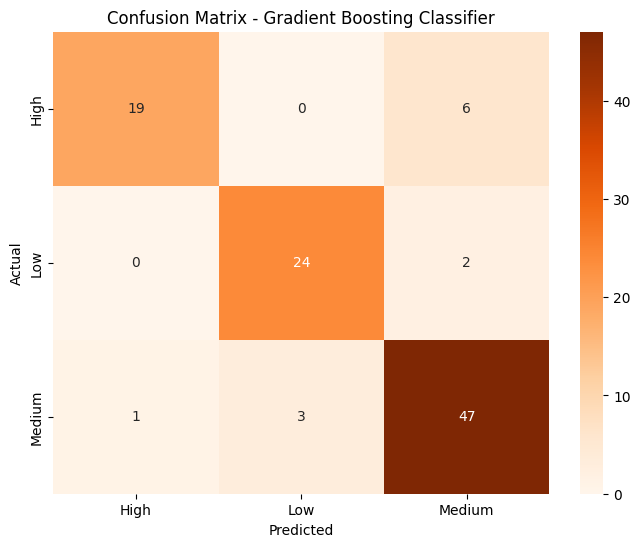

In [216]:
# Confusion Matrix
cm_gbc = confusion_matrix(y_test, y_pred_gbc)
cm_gbc_df = pd.DataFrame(cm_gbc, 
                        index=['High', 'Low', 'Medium'], 
                        columns=['High', 'Low', 'Medium'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gbc_df, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'])
plt.title('Confusion Matrix - Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [217]:
# ROC and AUC Analysis for Gradient Boosting Classifier
print("ROC CURVE AND AUC ANALYSIS - GRADIENT BOOSTING")
print("="*60)

# Get prediction probabilities for all classes
y_pred_proba_gbc = GBC.predict_proba(X_test)
classes_gbc = GBC.classes_
n_classes_gbc = len(classes_gbc)

print(f"Classes: {classes_gbc}")
print(f"Prediction probabilities shape: {y_pred_proba_gbc.shape}")

ROC CURVE AND AUC ANALYSIS - GRADIENT BOOSTING
Classes: ['High' 'Low' 'Medium']
Prediction probabilities shape: (102, 3)


In [218]:
# Convert multi-class to binary format for ROC analysis
y_test_bin_gbc = label_binarize(y_test, classes=classes_gbc)

# Compute ROC curve and AUC for each class
fpr_gbc = dict()
tpr_gbc = dict()
roc_auc_gbc = dict()

for i in range(n_classes_gbc):
    fpr_gbc[i], tpr_gbc[i], _ = roc_curve(y_test_bin_gbc[:, i], y_pred_proba_gbc[:, i])
    roc_auc_gbc[i] = auc(fpr_gbc[i], tpr_gbc[i])

# Compute micro-average ROC curve and AUC
fpr_gbc["micro"], tpr_gbc["micro"], _ = roc_curve(y_test_bin_gbc.ravel(), y_pred_proba_gbc.ravel())
roc_auc_gbc["micro"] = auc(fpr_gbc["micro"], tpr_gbc["micro"])

In [219]:
# Print AUC scores for Gradient Boosting
print("\nAUC SCORES - GRADIENT BOOSTING:")
print("-" * 40)
for i, class_name in enumerate(classes_gbc):
    print(f"{class_name:8} : {roc_auc_gbc[i]:.4f}")
print(f"{'Micro-avg':8} : {roc_auc_gbc['micro']:.4f}")


AUC SCORES - GRADIENT BOOSTING:
----------------------------------------
High     : 0.9787
Low      : 0.9620
Medium   : 0.9366
Micro-avg : 0.9642


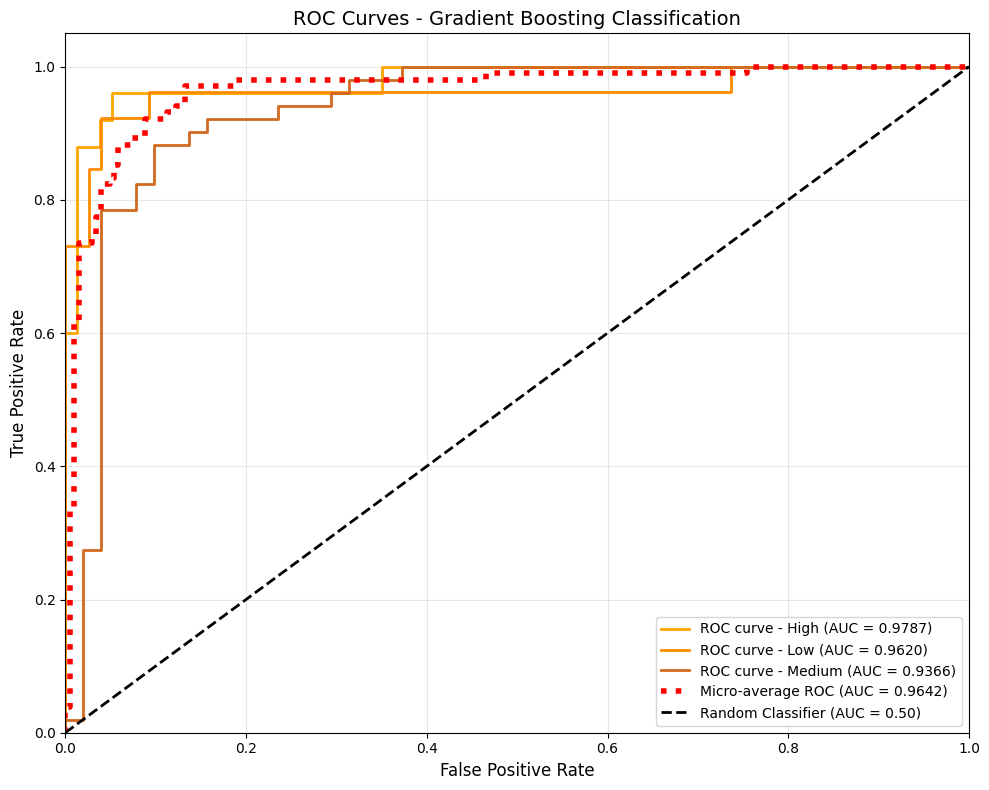

In [220]:
# Plot ROC curves for Gradient Boosting
plt.figure(figsize=(10, 8))

# Colors for different classes
colors = cycle(['orange', 'darkorange', 'chocolate'])

# Plot ROC curve for each class
for i, color, class_name in zip(range(n_classes_gbc), colors, classes_gbc):
    plt.plot(fpr_gbc[i], tpr_gbc[i], color=color, lw=2,
             label=f'ROC curve - {class_name} (AUC = {roc_auc_gbc[i]:.4f})')

# Plot micro-average ROC curve
plt.plot(fpr_gbc["micro"], tpr_gbc["micro"],
         label=f'Micro-average ROC (AUC = {roc_auc_gbc["micro"]:.4f})',
         color='red', linestyle=':', linewidth=4)

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.50)')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Gradient Boosting Classification', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [221]:
# Calculate overall AUC scores using different methods for Gradient Boosting
auc_ovr_gbc = roc_auc_score(y_test, y_pred_proba_gbc, multi_class='ovr', average='weighted')
auc_ovo_gbc = roc_auc_score(y_test, y_pred_proba_gbc, multi_class='ovo', average='weighted')

print("\nOVERALL AUC SCORES - GRADIENT BOOSTING:")
print("-" * 40)
print(f"One-vs-Rest (Weighted) : {auc_ovr_gbc:.4f}")
print(f"One-vs-One (Weighted)  : {auc_ovo_gbc:.4f}")
print(f"Micro-average          : {roc_auc_gbc['micro']:.4f}")


OVERALL AUC SCORES - GRADIENT BOOSTING:
----------------------------------------
One-vs-Rest (Weighted) : 0.9534
One-vs-One (Weighted)  : 0.9590
Micro-average          : 0.9642



FEATURE IMPORTANCE - GRADIENT BOOSTING CLASSIFIER (TOP 10)
    feature  importance
5        RM    0.325281
12    LSTAT    0.261430
7       DIS    0.137028
0      CRIM    0.090214
4       NOX    0.047877
10  PTRATIO    0.040933
11        B    0.031553
9       TAX    0.028628
2     INDUS    0.015307
6       AGE    0.011107


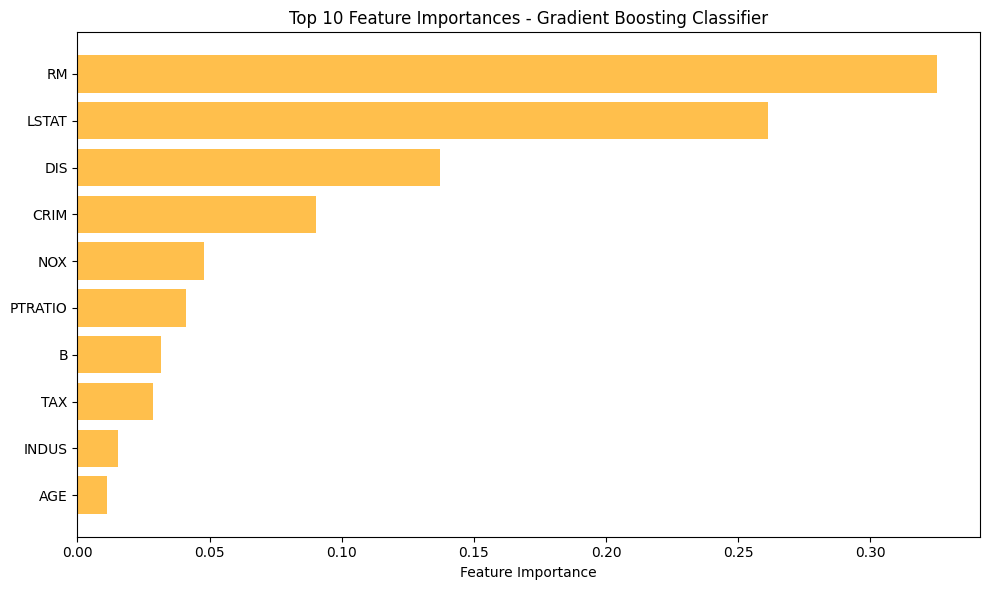

In [222]:
# Feature Importance for Gradient Boosting
feature_names = boston.drop(columns=['MEDV', 'MEDV_Class']).columns

feature_importance_gbc = pd.DataFrame({
    'feature': feature_names,
    'importance': GBC.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFEATURE IMPORTANCE - GRADIENT BOOSTING CLASSIFIER (TOP 10)")
print("="*60)
print(feature_importance_gbc.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance_gbc.head(10)
plt.barh(range(len(top_features)), top_features['importance'], color='orange', alpha=0.7)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances - Gradient Boosting Classifier')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### AdaBoost

In [223]:
# Create AdaBoost Classifier
ABC = AdaBoostClassifier(random_state=42)
ABC

AdaBoostClassifier(random_state=42)

In [224]:
%%time
ABC.fit(X_train, y_train)

CPU times: total: 156 ms
Wall time: 166 ms


AdaBoostClassifier(random_state=42)

In [225]:
y_pred_abc = ABC.predict(X_test)
y_pred_abc

array(['Low', 'High', 'Low', 'Medium', 'Medium', 'Medium', 'High', 'High',
       'High', 'Medium', 'High', 'Low', 'Medium', 'Medium', 'Medium',
       'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Low', 'Low', 'Low',
       'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'High', 'Low', 'Low', 'High', 'High', 'Medium', 'Low', 'High',
       'Low', 'Medium', 'High', 'Medium', 'High', 'Medium', 'High',
       'Medium', 'Medium', 'Medium', 'High', 'Low', 'Low', 'Medium',
       'Medium', 'Medium', 'High', 'Medium', 'High', 'Medium', 'Low',
       'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium',
       'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Low', 'High', 'High',
       'Medium', 'High', 'Medium', 'Medium', 'Medium', 'High', 'Medium',
       'Low', 'High', 'High', 'Medium', 'Medium', 'High', 'Medium',
       'High', 'Medium', 'Medium', 'Low', 'Medium', 'High', 'Low', 'Low',
       'Medium', 'Low', 'High', 'Low', 'Medium', 'Medium'], dtype=object)

In [226]:
y_test

399       Low
503    Medium
27        Low
119    Medium
492    Medium
        ...  
156       Low
4        High
20        Low
70     Medium
314    Medium
Name: MEDV_Class, Length: 102, dtype: object

In [ ]:
accuracy_ABC = accuracy_score(y_test, y_pred_abc)
precision_ABC = precision_score(y_test, y_pred_abc, average='weighted')
recall_ABC = recall_score(y_test, y_pred_abc, average='weighted')
f1_ABC = f1_score(y_test, y_pred_abc, average='weighted')

# Save model if better
save_model_if_better_classification(
    model_name="AdaBoost Classifier",
    model=ABC,
    scaler=scaler,
    scaler_name=scaler_name,
    accuracy=accuracy_ABC,
    precision=precision_ABC,
    recall=recall_ABC,
    f1=f1_ABC,
    parameters=ABC.get_params()
)

AdaBoost Classifier (robust): First time training - saving model
    New model saved to: saved_models_classification\adaboost_classifier_robust_20250713_160903.pkl
    New scaler saved to: saved_models_classification\adaboost_classifier_scaler_robust_20250713_160903.pkl


True

In [228]:
print("ADABOOST CLASSIFICATION RESULTS")
print("="*60)
print(f"Accuracy:  {accuracy_ABC:.4f}")
print(f"Precision: {precision_ABC:.4f}")
print(f"Recall:    {recall_ABC:.4f}")
print(f"F1-Score:  {f1_ABC:.4f}")

ADABOOST CLASSIFICATION RESULTS
Accuracy:  0.7843
Precision: 0.7845
Recall:    0.7843
F1-Score:  0.7840


In [229]:
print("\nDETAILED CLASSIFICATION REPORT - ADABOOST")
print("="*60)
print(classification_report(y_test, y_pred_abc))


DETAILED CLASSIFICATION REPORT - ADABOOST
              precision    recall  f1-score   support

        High       0.76      0.76      0.76        25
         Low       0.79      0.85      0.81        26
      Medium       0.80      0.76      0.78        51

    accuracy                           0.78       102
   macro avg       0.78      0.79      0.78       102
weighted avg       0.78      0.78      0.78       102



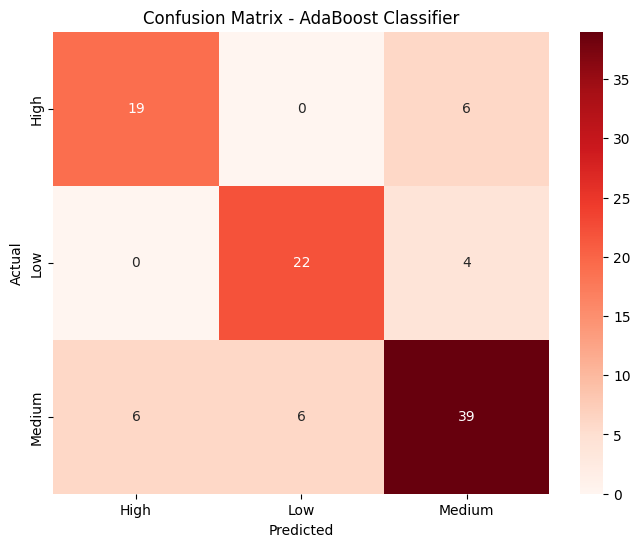

In [230]:
# Confusion Matrix
cm_abc = confusion_matrix(y_test, y_pred_abc)
cm_abc_df = pd.DataFrame(cm_abc, 
                        index=['High', 'Low', 'Medium'], 
                        columns=['High', 'Low', 'Medium'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_abc_df, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'])
plt.title('Confusion Matrix - AdaBoost Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [231]:
# ROC and AUC Analysis for AdaBoost Classifier
print("ROC CURVE AND AUC ANALYSIS - ADABOOST")
print("="*60)

# Get prediction probabilities for all classes
y_pred_proba_abc = ABC.predict_proba(X_test)
classes_abc = ABC.classes_
n_classes_abc = len(classes_abc)

print(f"Classes: {classes_abc}")
print(f"Prediction probabilities shape: {y_pred_proba_abc.shape}")

ROC CURVE AND AUC ANALYSIS - ADABOOST
Classes: ['High' 'Low' 'Medium']
Prediction probabilities shape: (102, 3)


In [232]:
# Convert multi-class to binary format for ROC analysis
y_test_bin_abc = label_binarize(y_test, classes=classes_abc)

# Compute ROC curve and AUC for each class
fpr_abc = dict()
tpr_abc = dict()
roc_auc_abc = dict()

for i in range(n_classes_abc):
    fpr_abc[i], tpr_abc[i], _ = roc_curve(y_test_bin_abc[:, i], y_pred_proba_abc[:, i])
    roc_auc_abc[i] = auc(fpr_abc[i], tpr_abc[i])

# Compute micro-average ROC curve and AUC
fpr_abc["micro"], tpr_abc["micro"], _ = roc_curve(y_test_bin_abc.ravel(), y_pred_proba_abc.ravel())
roc_auc_abc["micro"] = auc(fpr_abc["micro"], tpr_abc["micro"])

In [233]:
# Print AUC scores for AdaBoost
print("\nAUC SCORES - ADABOOST:")
print("-" * 40)
for i, class_name in enumerate(classes_abc):
    print(f"{class_name:8} : {roc_auc_abc[i]:.4f}")
print(f"{'Micro-avg':8} : {roc_auc_abc['micro']:.4f}")


AUC SCORES - ADABOOST:
----------------------------------------
High     : 0.9408
Low      : 0.9453
Medium   : 0.8085
Micro-avg : 0.9102


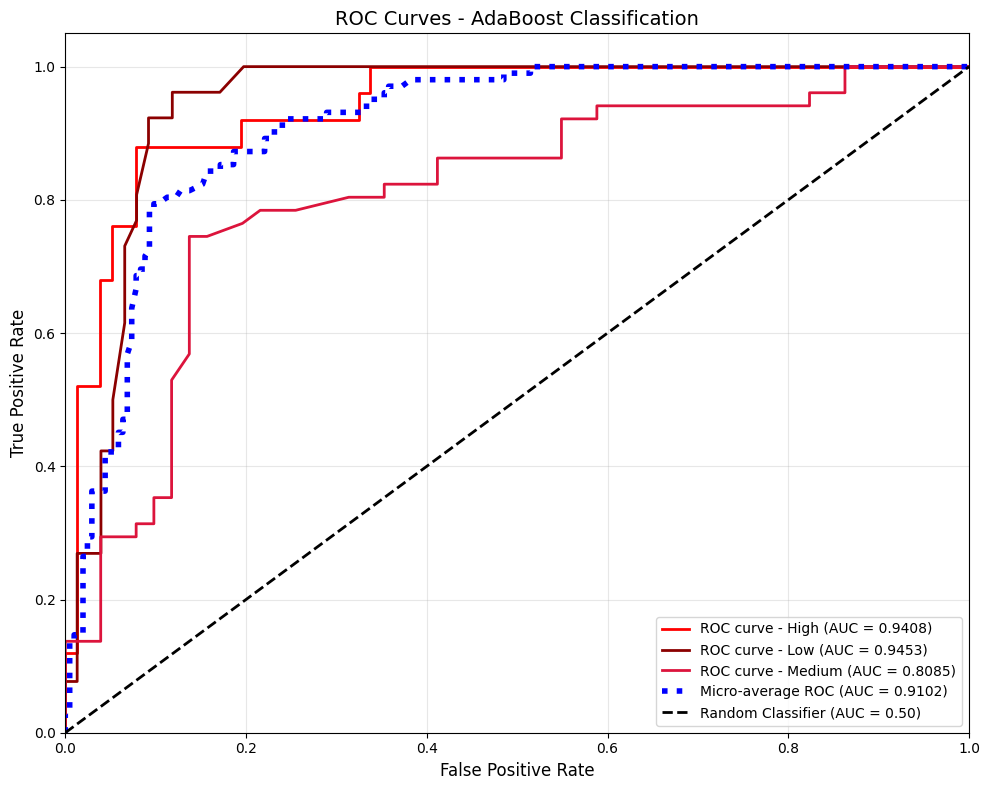

In [234]:
# Plot ROC curves for AdaBoost
plt.figure(figsize=(10, 8))

# Colors for different classes
colors = cycle(['red', 'darkred', 'crimson'])

# Plot ROC curve for each class
for i, color, class_name in zip(range(n_classes_abc), colors, classes_abc):
    plt.plot(fpr_abc[i], tpr_abc[i], color=color, lw=2,
             label=f'ROC curve - {class_name} (AUC = {roc_auc_abc[i]:.4f})')

# Plot micro-average ROC curve
plt.plot(fpr_abc["micro"], tpr_abc["micro"],
         label=f'Micro-average ROC (AUC = {roc_auc_abc["micro"]:.4f})',
         color='blue', linestyle=':', linewidth=4)

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.50)')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - AdaBoost Classification', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [235]:
# Calculate overall AUC scores using different methods for AdaBoost
auc_ovr_abc = roc_auc_score(y_test, y_pred_proba_abc, multi_class='ovr', average='weighted')
auc_ovo_abc = roc_auc_score(y_test, y_pred_proba_abc, multi_class='ovo', average='weighted')

print("\nOVERALL AUC SCORES - ADABOOST:")
print("-" * 40)
print(f"One-vs-Rest (Weighted) : {auc_ovr_abc:.4f}")
print(f"One-vs-One (Weighted)  : {auc_ovo_abc:.4f}")
print(f"Micro-average          : {roc_auc_abc['micro']:.4f}")


OVERALL AUC SCORES - ADABOOST:
----------------------------------------
One-vs-Rest (Weighted) : 0.8758
One-vs-One (Weighted)  : 0.8958
Micro-average          : 0.9102



FEATURE IMPORTANCE - ADABOOST CLASSIFIER (TOP 10)
    feature  importance
12    LSTAT    0.252390
7       DIS    0.178755
5        RM    0.164867
8       RAD    0.093505
4       NOX    0.082248
0      CRIM    0.062747
10  PTRATIO    0.058135
2     INDUS    0.057988
9       TAX    0.023759
11        B    0.015098


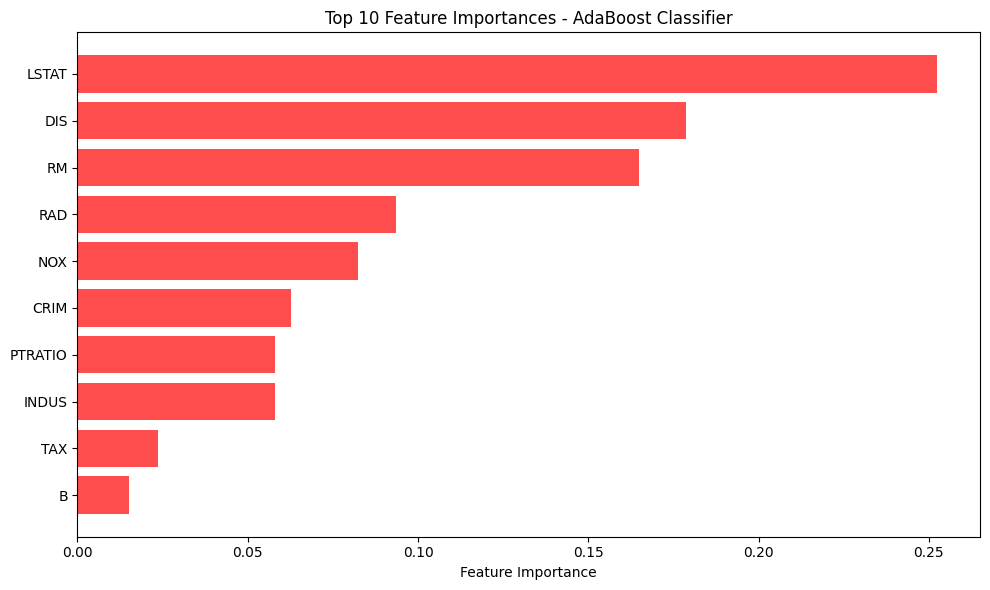

In [236]:
# Feature Importance for AdaBoost
feature_names = boston.drop(columns=['MEDV', 'MEDV_Class']).columns

feature_importance_abc = pd.DataFrame({
    'feature': feature_names,
    'importance': ABC.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFEATURE IMPORTANCE - ADABOOST CLASSIFIER (TOP 10)")
print("="*60)
print(feature_importance_abc.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance_abc.head(10)
plt.barh(range(len(top_features)), top_features['importance'], color='red', alpha=0.7)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances - AdaBoost Classifier')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### LightGBM

In [237]:
# Create LightGBM Classifier
LGBM = LGBMClassifier(
    random_state=42,
    verbose=1,  # Shows training progress
    objective='multiclass',
    num_class=3,
    metric='multi_logloss'
)
LGBM

LGBMClassifier(metric='multi_logloss', num_class=3, objective='multiclass',
               random_state=42, verbose=1)

In [238]:
%%time
LGBM.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000586 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 959
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 13
[LightGBM] [Info] Start training from score -1.406295
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -0.683295
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

LGBMClassifier(metric='multi_logloss', num_class=3, objective='multiclass',
               random_state=42, verbose=1)

In [239]:
y_pred_lgbm = LGBM.predict(X_test)
y_pred_lgbm

c:\Users\joyde\Documents\GitHub\BostonML\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


array(['Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'Medium', 'High', 'Low', 'Medium', 'Medium',
       'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'High', 'Low', 'Low', 'Medium', 'High',
       'Medium', 'Low', 'High', 'Low', 'High', 'High', 'Low', 'High',
       'Medium', 'High', 'Medium', 'Medium', 'Medium', 'High', 'Low',
       'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'High',
       'Medium', 'Low', 'Medium', 'High', 'Low', 'Medium', 'Medium',
       'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Low',
       'High', 'High', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'High', 'Medium', 'Medium', 'High', 'High', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'High', 'Low', 'Medium', 'Medium', 'Low', 'High', 'Low', 'Medium',
       'Medi

In [240]:
y_test

399       Low
503    Medium
27        Low
119    Medium
492    Medium
        ...  
156       Low
4        High
20        Low
70     Medium
314    Medium
Name: MEDV_Class, Length: 102, dtype: object

In [ ]:
accuracy_LGBM = accuracy_score(y_test, y_pred_lgbm)
precision_LGBM = precision_score(y_test, y_pred_lgbm, average='weighted')
recall_LGBM = recall_score(y_test, y_pred_lgbm, average='weighted')
f1_LGBM = f1_score(y_test, y_pred_lgbm, average='weighted')

# Save model if better
save_model_if_better_classification(
    model_name="LightGBM Classifier",
    model=LGBM,
    scaler=scaler,
    scaler_name=scaler_name,
    accuracy=accuracy_LGBM,
    precision=precision_LGBM,
    recall=recall_LGBM,
    f1=f1_LGBM,
    parameters=LGBM.get_params()
)

LightGBM Classifier (robust): First time training - saving model
    New model saved to: saved_models_classification\lightgbm_classifier_robust_20250713_160908.pkl
    New scaler saved to: saved_models_classification\lightgbm_classifier_scaler_robust_20250713_160908.pkl


True

In [242]:
print("LIGHTGBM CLASSIFICATION RESULTS")
print("="*60)
print(f"Accuracy:  {accuracy_LGBM:.4f}")
print(f"Precision: {precision_LGBM:.4f}")
print(f"Recall:    {recall_LGBM:.4f}")
print(f"F1-Score:  {f1_LGBM:.4f}")

LIGHTGBM CLASSIFICATION RESULTS
Accuracy:  0.8431
Precision: 0.8465
Recall:    0.8431
F1-Score:  0.8427


In [243]:
print("\nDETAILED CLASSIFICATION REPORT - LIGHTGBM")
print("="*60)
print(classification_report(y_test, y_pred_lgbm))


DETAILED CLASSIFICATION REPORT - LIGHTGBM
              precision    recall  f1-score   support

        High       0.90      0.76      0.83        25
         Low       0.85      0.85      0.85        26
      Medium       0.82      0.88      0.85        51

    accuracy                           0.84       102
   macro avg       0.86      0.83      0.84       102
weighted avg       0.85      0.84      0.84       102



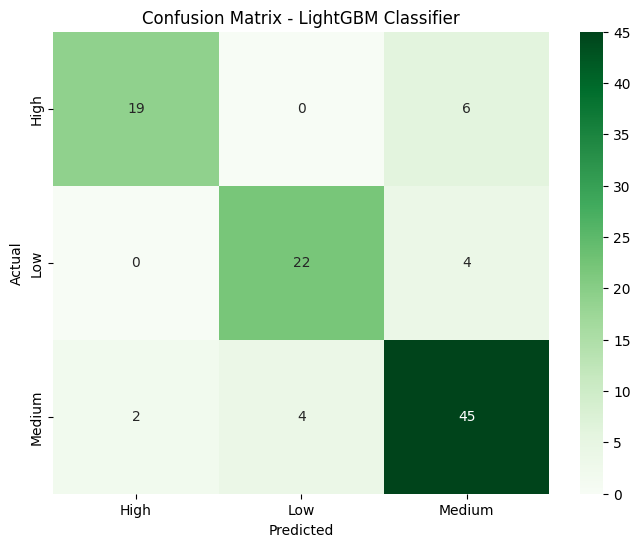

In [244]:
# Confusion Matrix
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
cm_lgbm_df = pd.DataFrame(cm_lgbm, 
                         index=['High', 'Low', 'Medium'], 
                         columns=['High', 'Low', 'Medium'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lgbm_df, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'])
plt.title('Confusion Matrix - LightGBM Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [245]:
# ROC and AUC Analysis for LightGBM Classifier
print("ROC CURVE AND AUC ANALYSIS - LIGHTGBM")
print("="*60)

# Get prediction probabilities for all classes
y_pred_proba_lgbm = LGBM.predict_proba(X_test)
classes_lgbm = LGBM.classes_
n_classes_lgbm = len(classes_lgbm)

print(f"Classes: {classes_lgbm}")
print(f"Prediction probabilities shape: {y_pred_proba_lgbm.shape}")

ROC CURVE AND AUC ANALYSIS - LIGHTGBM
Classes: ['High' 'Low' 'Medium']
Prediction probabilities shape: (102, 3)


c:\Users\joyde\Documents\GitHub\BostonML\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [246]:
# Convert multi-class to binary format for ROC analysis
y_test_bin_lgbm = label_binarize(y_test, classes=classes_lgbm)

# Compute ROC curve and AUC for each class
fpr_lgbm = dict()
tpr_lgbm = dict()
roc_auc_lgbm = dict()

for i in range(n_classes_lgbm):
    fpr_lgbm[i], tpr_lgbm[i], _ = roc_curve(y_test_bin_lgbm[:, i], y_pred_proba_lgbm[:, i])
    roc_auc_lgbm[i] = auc(fpr_lgbm[i], tpr_lgbm[i])

# Compute micro-average ROC curve and AUC
fpr_lgbm["micro"], tpr_lgbm["micro"], _ = roc_curve(y_test_bin_lgbm.ravel(), y_pred_proba_lgbm.ravel())
roc_auc_lgbm["micro"] = auc(fpr_lgbm["micro"], tpr_lgbm["micro"])

In [247]:
# Print AUC scores for LightGBM
print("\nAUC SCORES - LIGHTGBM:")
print("-" * 40)
for i, class_name in enumerate(classes_lgbm):
    print(f"{class_name:8} : {roc_auc_lgbm[i]:.4f}")
print(f"{'Micro-avg':8} : {roc_auc_lgbm['micro']:.4f}")


AUC SCORES - LIGHTGBM:
----------------------------------------
High     : 0.9740
Low      : 0.9545
Medium   : 0.9254
Micro-avg : 0.9586


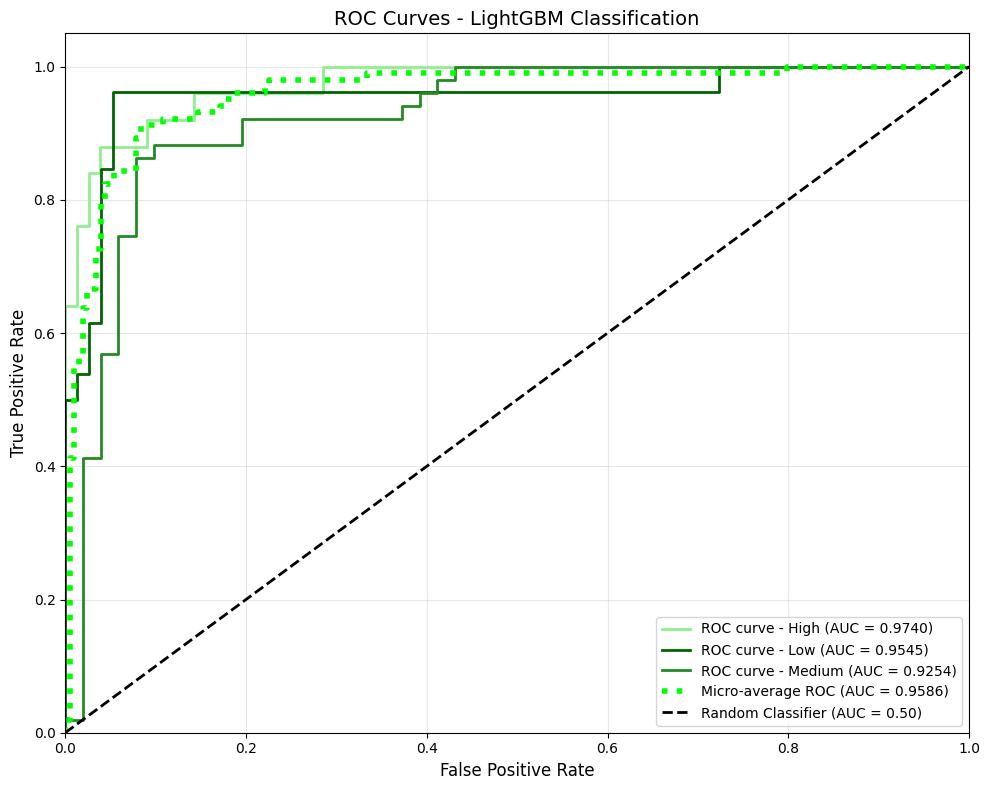

In [248]:
# Plot ROC curves for LightGBM
plt.figure(figsize=(10, 8))

# Colors for different classes (using green theme for LightGBM)
colors = cycle(['lightgreen', 'darkgreen', 'forestgreen'])

# Plot ROC curve for each class
for i, color, class_name in zip(range(n_classes_lgbm), colors, classes_lgbm):
    plt.plot(fpr_lgbm[i], tpr_lgbm[i], color=color, lw=2,
             label=f'ROC curve - {class_name} (AUC = {roc_auc_lgbm[i]:.4f})')

# Plot micro-average ROC curve
plt.plot(fpr_lgbm["micro"], tpr_lgbm["micro"],
         label=f'Micro-average ROC (AUC = {roc_auc_lgbm["micro"]:.4f})',
         color='lime', linestyle=':', linewidth=4)

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.50)')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - LightGBM Classification', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [249]:
# Calculate overall AUC scores using different methods for LightGBM
auc_ovr_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm, multi_class='ovr', average='weighted')
auc_ovo_lgbm = roc_auc_score(y_test, y_pred_proba_lgbm, multi_class='ovo', average='weighted')

print("\nOVERALL AUC SCORES - LIGHTGBM:")
print("-" * 40)
print(f"One-vs-Rest (Weighted) : {auc_ovr_lgbm:.4f}")
print(f"One-vs-One (Weighted)  : {auc_ovo_lgbm:.4f}")
print(f"Micro-average          : {roc_auc_lgbm['micro']:.4f}")


OVERALL AUC SCORES - LIGHTGBM:
----------------------------------------
One-vs-Rest (Weighted) : 0.9447
One-vs-One (Weighted)  : 0.9510
Micro-average          : 0.9586



FEATURE IMPORTANCE - LIGHTGBM CLASSIFIER (TOP 10)
    feature  importance
12    LSTAT         846
5        RM         829
7       DIS         772
6       AGE         566
11        B         547
0      CRIM         520
4       NOX         388
9       TAX         293
10  PTRATIO         255
2     INDUS         248


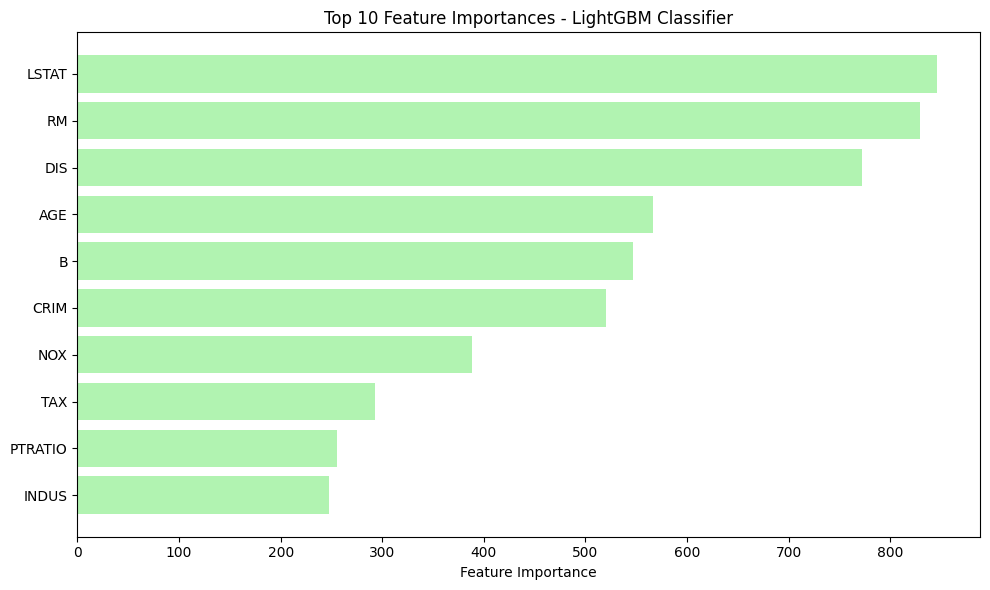

In [250]:
# Feature Importance for LightGBM
feature_names = boston.drop(columns=['MEDV', 'MEDV_Class']).columns

feature_importance_lgbm = pd.DataFrame({
    'feature': feature_names,
    'importance': LGBM.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFEATURE IMPORTANCE - LIGHTGBM CLASSIFIER (TOP 10)")
print("="*60)
print(feature_importance_lgbm.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
top_features = feature_importance_lgbm.head(10)
plt.barh(range(len(top_features)), top_features['importance'], color='lightgreen', alpha=0.7)
plt.yticks(range(len(top_features)), top_features['feature'])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances - LightGBM Classifier')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### Stacking

In [251]:
# Define base classifiers for stacking
base_classifiers = [
    ('logistic', LogisticRegression(random_state=42, max_iter=1000)),
    ('random_forest', RandomForestClassifier(random_state=42, n_estimators=100)),
    ('svm', SVC(random_state=42, probability=True)),
    ('gradient_boost', GradientBoostingClassifier(random_state=42, n_estimators=100)),
    ('ada_boost', AdaBoostClassifier(random_state=42, n_estimators=100, algorithm='SAMME')),
    ('lightgbm', LGBMClassifier(random_state=42, verbose=-1, objective='multiclass', num_class=3))
]

# Define meta-classifier (final estimator)
meta_classifier = LogisticRegression(random_state=42, max_iter=1000)

In [252]:
# Create Stacking Classifier
stacking_clf = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier,
    cv=5,  # Cross-validation folds for training base classifiers
    stack_method='predict_proba',  # Use probabilities for stacking
    n_jobs=-1,
    verbose=1
)

stacking_clf

StackingClassifier(cv=5,
                   estimators=[('logistic',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42)),
                               ('random_forest',
                                RandomForestClassifier(random_state=42)),
                               ('svm', SVC(probability=True, random_state=42)),
                               ('gradient_boost',
                                GradientBoostingClassifier(random_state=42)),
                               ('ada_boost',
                                AdaBoostClassifier(algorithm='SAMME',
                                                   n_estimators=100,
                                                   random_state=42)),
                               ('lightgbm',
                                LGBMClassifier(num_class=3,
                                               objective='multiclass',
                                               random_state=42, verbose=-1))],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=42),
                   n_jobs=-1, stack_method='predict_proba', verbose=1)

In [253]:
%%time
print("Training Stacking Classifier with base models:")
for name, model in base_classifiers:
    print(f"  - {name}: {type(model).__name__}")
print(f"Meta-classifier: {type(meta_classifier).__name__}")
print()

stacking_clf.fit(X_train, y_train)

Training Stacking Classifier with base models:
  - logistic: LogisticRegression
  - random_forest: RandomForestClassifier
  - svm: SVC
  - gradient_boost: GradientBoostingClassifier
  - ada_boost: AdaBoostClassifier
  - lightgbm: LGBMClassifier
Meta-classifier: LogisticRegression

CPU times: total: 188 ms
Wall time: 7.14 s


StackingClassifier(cv=5,
                   estimators=[('logistic',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42)),
                               ('random_forest',
                                RandomForestClassifier(random_state=42)),
                               ('svm', SVC(probability=True, random_state=42)),
                               ('gradient_boost',
                                GradientBoostingClassifier(random_state=42)),
                               ('ada_boost',
                                AdaBoostClassifier(algorithm='SAMME',
                                                   n_estimators=100,
                                                   random_state=42)),
                               ('lightgbm',
                                LGBMClassifier(num_class=3,
                                               objective='multiclass',
                                               random_state=42, verbose=-1))],
                   final_estimator=LogisticRegression(max_iter=1000,
                                                      random_state=42),
                   n_jobs=-1, stack_method='predict_proba', verbose=1)

In [254]:
y_pred_stacking = stacking_clf.predict(X_test)
y_pred_stacking

c:\Users\joyde\Documents\GitHub\BostonML\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


array(['Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'High', 'Medium', 'High', 'Low', 'Medium', 'Medium',
       'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Medium',
       'Low', 'Low', 'Medium', 'Medium', 'Low', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'High',
       'Medium', 'Low', 'High', 'Low', 'High', 'High', 'Low', 'High',
       'Medium', 'High', 'Medium', 'Medium', 'Medium', 'High', 'Low',
       'Low', 'Medium', 'Medium', 'Medium', 'High', 'Medium', 'High',
       'Medium', 'Low', 'Low', 'Medium', 'Low', 'Low', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'Low',
       'High', 'High', 'Medium', 'High', 'Medium', 'Medium', 'Medium',
       'High', 'Medium', 'Medium', 'High', 'High', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'High', 'Low', 'Low', 'Medium', 'Low', 'High', 'Low', 'Medium',
       'Medium

In [255]:
y_test

399       Low
503    Medium
27        Low
119    Medium
492    Medium
        ...  
156       Low
4        High
20        Low
70     Medium
314    Medium
Name: MEDV_Class, Length: 102, dtype: object

In [ ]:
accuracy_Stacking = accuracy_score(y_test, y_pred_stacking)
precision_Stacking = precision_score(y_test, y_pred_stacking, average='weighted')
recall_Stacking = recall_score(y_test, y_pred_stacking, average='weighted')
f1_Stacking = f1_score(y_test, y_pred_stacking, average='weighted')

# Save model if better
save_model_if_better_classification(
    model_name="Stacking Classifier",
    model=stacking_clf,
    scaler=scaler,
    scaler_name=scaler_name,
    accuracy=accuracy_Stacking,
    precision=precision_Stacking,
    recall=recall_Stacking,
    f1=f1_Stacking,
    parameters=stacking_clf.get_params()
)

Stacking Classifier (robust): First time training - saving model
    New model saved to: saved_models_classification\stacking_classifier_robust_20250713_160917.pkl
    New scaler saved to: saved_models_classification\stacking_classifier_scaler_robust_20250713_160917.pkl


True

In [257]:
print("STACKING CLASSIFICATION RESULTS")
print("="*60)
print(f"Accuracy:  {accuracy_Stacking:.4f}")
print(f"Precision: {precision_Stacking:.4f}")
print(f"Recall:    {recall_Stacking:.4f}")
print(f"F1-Score:  {f1_Stacking:.4f}")

STACKING CLASSIFICATION RESULTS
Accuracy:  0.8824
Precision: 0.8871
Recall:    0.8824
F1-Score:  0.8800


In [258]:
print("\nDETAILED CLASSIFICATION REPORT - STACKING")
print("="*60)
print(classification_report(y_test, y_pred_stacking))


DETAILED CLASSIFICATION REPORT - STACKING
              precision    recall  f1-score   support

        High       0.95      0.72      0.82        25
         Low       0.89      0.96      0.93        26
      Medium       0.85      0.92      0.89        51

    accuracy                           0.88       102
   macro avg       0.90      0.87      0.88       102
weighted avg       0.89      0.88      0.88       102



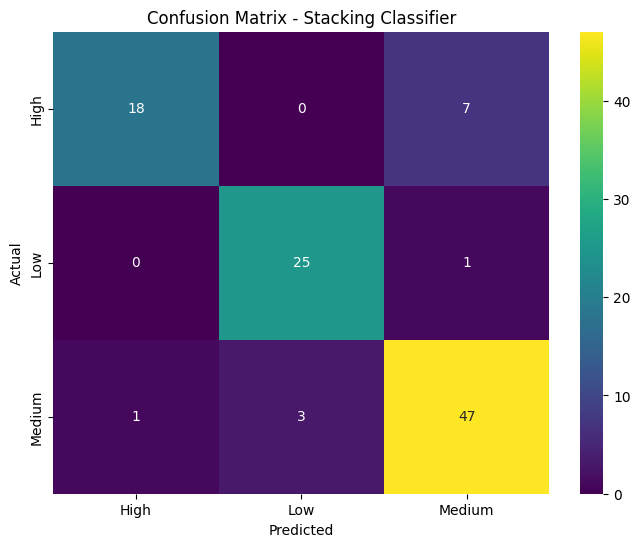

In [259]:
# Confusion Matrix
cm_stacking = confusion_matrix(y_test, y_pred_stacking)
cm_stacking_df = pd.DataFrame(cm_stacking, 
                             index=['High', 'Low', 'Medium'], 
                             columns=['High', 'Low', 'Medium'])

plt.figure(figsize=(8, 6))
sns.heatmap(cm_stacking_df, annot=True, fmt='d', cmap='viridis', 
            xticklabels=['High', 'Low', 'Medium'],
            yticklabels=['High', 'Low', 'Medium'])
plt.title('Confusion Matrix - Stacking Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [260]:
# ROC and AUC Analysis for Stacking Classifier
print("ROC CURVE AND AUC ANALYSIS - STACKING")
print("="*60)

# Get prediction probabilities for all classes
y_pred_proba_stacking = stacking_clf.predict_proba(X_test)
classes_stacking = stacking_clf.classes_
n_classes_stacking = len(classes_stacking)

print(f"Classes: {classes_stacking}")
print(f"Prediction probabilities shape: {y_pred_proba_stacking.shape}")

ROC CURVE AND AUC ANALYSIS - STACKING
Classes: ['High' 'Low' 'Medium']
Prediction probabilities shape: (102, 3)


c:\Users\joyde\Documents\GitHub\BostonML\.venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [261]:
# Convert multi-class to binary format for ROC analysis
y_test_bin_stacking = label_binarize(y_test, classes=classes_stacking)

# Compute ROC curve and AUC for each class
fpr_stacking = dict()
tpr_stacking = dict()
roc_auc_stacking = dict()

for i in range(n_classes_stacking):
    fpr_stacking[i], tpr_stacking[i], _ = roc_curve(y_test_bin_stacking[:, i], y_pred_proba_stacking[:, i])
    roc_auc_stacking[i] = auc(fpr_stacking[i], tpr_stacking[i])

# Compute micro-average ROC curve and AUC
fpr_stacking["micro"], tpr_stacking["micro"], _ = roc_curve(y_test_bin_stacking.ravel(), y_pred_proba_stacking.ravel())
roc_auc_stacking["micro"] = auc(fpr_stacking["micro"], tpr_stacking["micro"])

In [262]:
# Print AUC scores for Stacking
print("\nAUC SCORES - STACKING:")
print("-" * 40)
for i, class_name in enumerate(classes_stacking):
    print(f"{class_name:8} : {roc_auc_stacking[i]:.4f}")
print(f"{'Micro-avg':8} : {roc_auc_stacking['micro']:.4f}")


AUC SCORES - STACKING:
----------------------------------------
High     : 0.9610
Low      : 0.9727
Medium   : 0.9170
Micro-avg : 0.9558


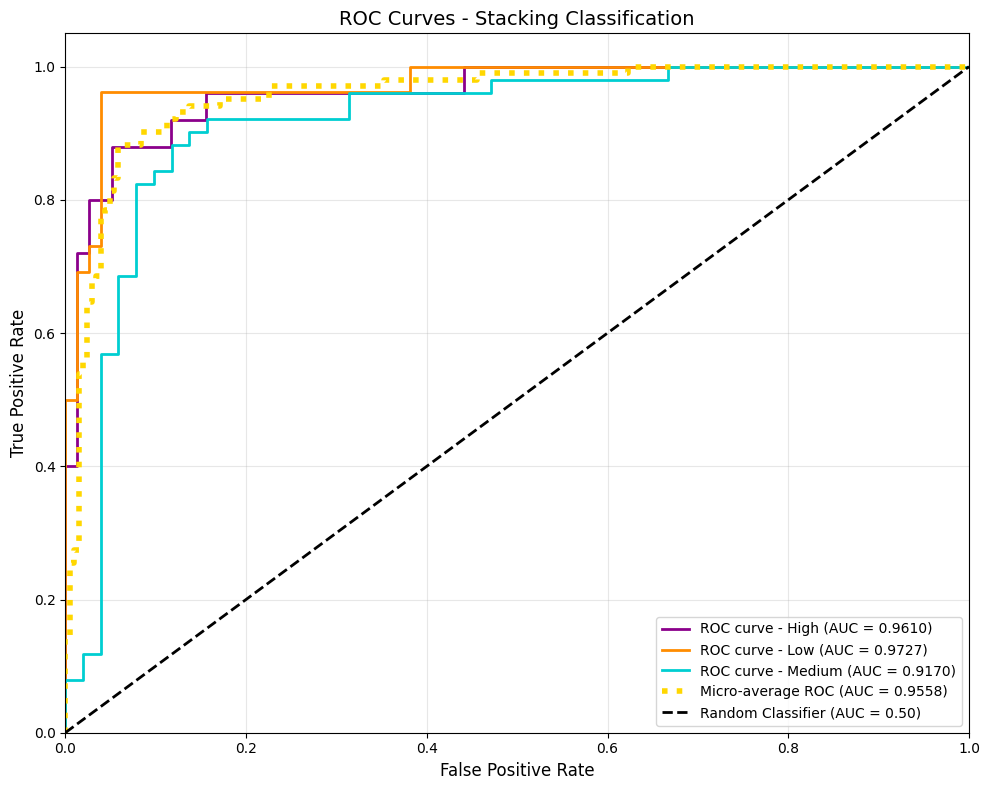

In [263]:
# Plot ROC curves for Stacking
plt.figure(figsize=(10, 8))

# Colors for different classes (using viridis theme for Stacking)
colors = cycle(['darkmagenta', 'darkorange', 'darkturquoise'])

# Plot ROC curve for each class
for i, color, class_name in zip(range(n_classes_stacking), colors, classes_stacking):
    plt.plot(fpr_stacking[i], tpr_stacking[i], color=color, lw=2,
             label=f'ROC curve - {class_name} (AUC = {roc_auc_stacking[i]:.4f})')

# Plot micro-average ROC curve
plt.plot(fpr_stacking["micro"], tpr_stacking["micro"],
         label=f'Micro-average ROC (AUC = {roc_auc_stacking["micro"]:.4f})',
         color='gold', linestyle=':', linewidth=4)

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier (AUC = 0.50)')

# Formatting
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves - Stacking Classification', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [264]:
# Calculate overall AUC scores using different methods for Stacking
auc_ovr_stacking = roc_auc_score(y_test, y_pred_proba_stacking, multi_class='ovr', average='weighted')
auc_ovo_stacking = roc_auc_score(y_test, y_pred_proba_stacking, multi_class='ovo', average='weighted')

print("\nOVERALL AUC SCORES - STACKING:")
print("-" * 40)
print(f"One-vs-Rest (Weighted) : {auc_ovr_stacking:.4f}")
print(f"One-vs-One (Weighted)  : {auc_ovo_stacking:.4f}")
print(f"Micro-average          : {roc_auc_stacking['micro']:.4f}")


OVERALL AUC SCORES - STACKING:
----------------------------------------
One-vs-Rest (Weighted) : 0.9420
One-vs-One (Weighted)  : 0.9499
Micro-average          : 0.9558


### Comparison of All Classifier Model

In [265]:
show_model_registry_classification()


CLASSIFICATION MODEL REGISTRY - BEST PERFORMING MODELS (Sorted by F1)
                      model_name scaler_type  accuracy  precision   recall       f1       timestamp
    Gradient Boosting Classifier      minmax  0.882353   0.886695 0.882353 0.881223 20250713_024840
    Gradient Boosting Classifier    standard  0.882353   0.886695 0.882353 0.881223 20250713_133306
    Gradient Boosting Classifier      robust  0.882353   0.886695 0.882353 0.881223 20250713_160901
             Stacking Classifier      robust  0.882353   0.887062 0.882353 0.879951 20250713_160917
             LightGBM Classifier    standard  0.872549   0.877976 0.872549 0.871714 20250713_133315
             Stacking Classifier      minmax  0.872549   0.878715 0.872549 0.869071 20250713_025126
        Random Forest Classifier      robust  0.872549   0.878715 0.872549 0.869071 20250713_160845
             Stacking Classifier    standard  0.872549   0.878715 0.872549 0.869071 20250713_133326
        Random Forest Classif